In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
    
import datetime

import pandas as pd

import pvlib

import ephem

import requests

import math

import numpy as np

import matplotlib.image as mpimg

import pytz

import csv

import os

import glob

from tkinter import filedialog

from tkinter import Tk

## Исходные данные:

In [2]:
A = pvlib.location.Location(
    44.92, 
    37.33, 
    tz='Europe/Moscow', 
    altitude=7, 
    name='Хутор Чембурка')
A

Location: 
  name: Хутор Чембурка
  latitude: 44.92
  longitude: 37.33
  altitude: 7
  tz: Europe/Moscow

## Анализируеммый промежуток времени:

In [3]:
start_t = datetime.datetime(2023,1,1,0)

end_t = datetime.datetime(2023,12,31,23)

times = pd.date_range(start=start_t, end=end_t, freq='1h') 
times

DatetimeIndex(['2023-01-01 00:00:00', '2023-01-01 01:00:00',
               '2023-01-01 02:00:00', '2023-01-01 03:00:00',
               '2023-01-01 04:00:00', '2023-01-01 05:00:00',
               '2023-01-01 06:00:00', '2023-01-01 07:00:00',
               '2023-01-01 08:00:00', '2023-01-01 09:00:00',
               ...
               '2023-12-31 14:00:00', '2023-12-31 15:00:00',
               '2023-12-31 16:00:00', '2023-12-31 17:00:00',
               '2023-12-31 18:00:00', '2023-12-31 19:00:00',
               '2023-12-31 20:00:00', '2023-12-31 21:00:00',
               '2023-12-31 22:00:00', '2023-12-31 23:00:00'],
              dtype='datetime64[ns]', length=8760, freq='h')

## Локализация времени:

In [4]:
times_loc = times.tz_localize(tz=A.tz)
times_loc

DatetimeIndex(['2023-01-01 00:00:00+03:00', '2023-01-01 01:00:00+03:00',
               '2023-01-01 02:00:00+03:00', '2023-01-01 03:00:00+03:00',
               '2023-01-01 04:00:00+03:00', '2023-01-01 05:00:00+03:00',
               '2023-01-01 06:00:00+03:00', '2023-01-01 07:00:00+03:00',
               '2023-01-01 08:00:00+03:00', '2023-01-01 09:00:00+03:00',
               ...
               '2023-12-31 14:00:00+03:00', '2023-12-31 15:00:00+03:00',
               '2023-12-31 16:00:00+03:00', '2023-12-31 17:00:00+03:00',
               '2023-12-31 18:00:00+03:00', '2023-12-31 19:00:00+03:00',
               '2023-12-31 20:00:00+03:00', '2023-12-31 21:00:00+03:00',
               '2023-12-31 22:00:00+03:00', '2023-12-31 23:00:00+03:00'],
              dtype='datetime64[ns, Europe/Moscow]', length=8760, freq=None)

## Положение Солнца над горизонтом за год:

In [5]:
SPA = pvlib.solarposition.spa_python(times_loc, 
                                     A.latitude, 
                                     A.longitude, 
                                     altitude=A.altitude,
                                     pressure=101592, 
                                     temperature=15, 
                                     delta_t=67.0, 
                                     atmos_refract=None, 
                                     how='numpy', 
                                     numthreads=4)
SPA

,apparent_zenith,zenith,apparent_elevation,elevation,azimuth,equation_of_time
2023-01-01 00:00:00+03:00,157.066403,157.066403,-67.066403,-67.066403,339.689516,-3.128158
2023-01-01 01:00:00+03:00,157.483706,157.483706,-67.483706,-67.483706,15.888451,-3.147915
2023-01-01 02:00:00+03:00,151.945502,151.945502,-61.945502,-61.945502,45.910402,-3.167663
2023-01-01 03:00:00+03:00,143.125576,143.125576,-53.125576,-53.125576,65.903710,-3.187402
2023-01-01 04:00:00+03:00,132.980006,132.980006,-42.980006,-42.980006,79.988797,-3.207132
...,...,...,...,...,...,...
2023-12-31 19:00:00+03:00,110.594925,110.594925,-20.594925,-20.594925,257.477769,-2.916870
2023-12-31 20:00:00+03:00,121.104227,121.104227,-31.104227,-31.104227,267.422219,-2.936709
2023-12-31 21:00:00+03:00,131.690937,131.690937,-41.690937,-41.690937,278.444970,-2.956539
2023-12-31 22:00:00+03:00,141.923588,141.923588,-51.923588,-51.923588,292.045307,-2.976363


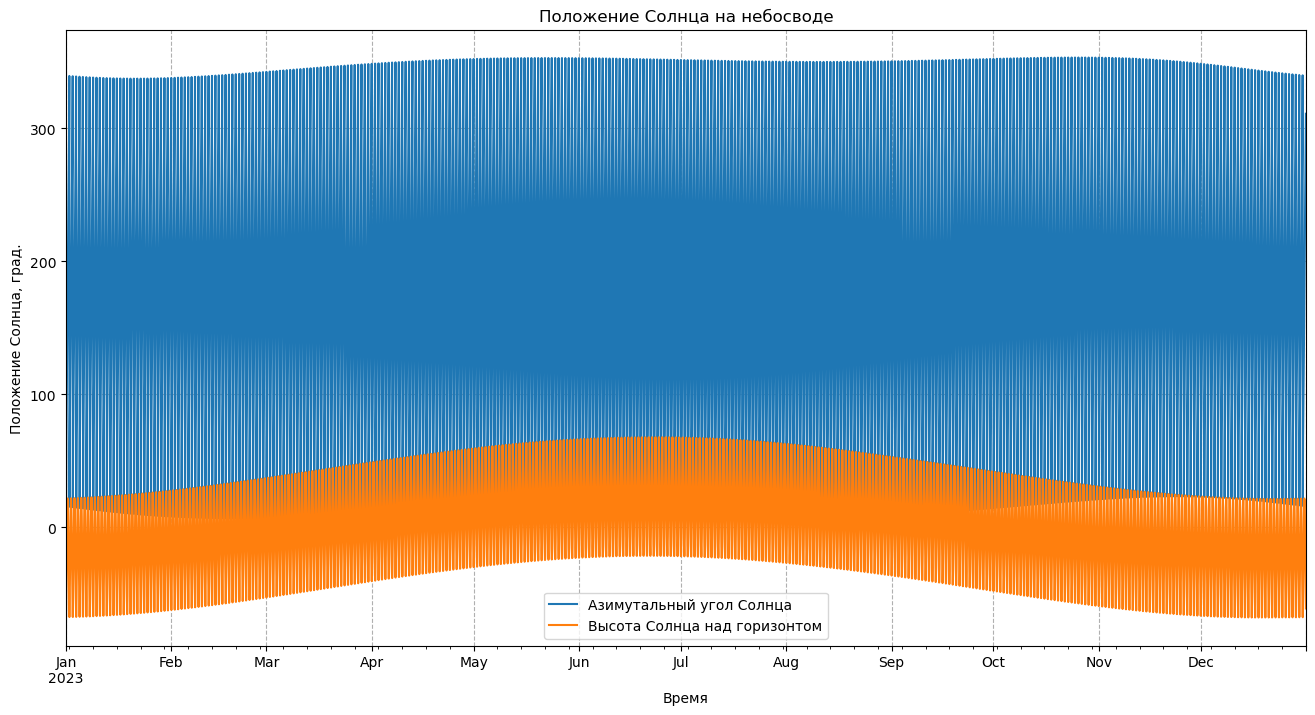

In [6]:
SPA['azimuth'].plot(label='Азимутальный угол Солнца', figsize=(16, 8))
SPA['elevation'].plot(label='Высота Солнца над горизонтом')
plt.grid(linestyle='--')
plt.legend()
plt.ylabel('Положение Солнца, град.')
plt.xlabel('Время')
plt.title('Положение Солнца на небосводе')
plt.show()

## Характерные дни:

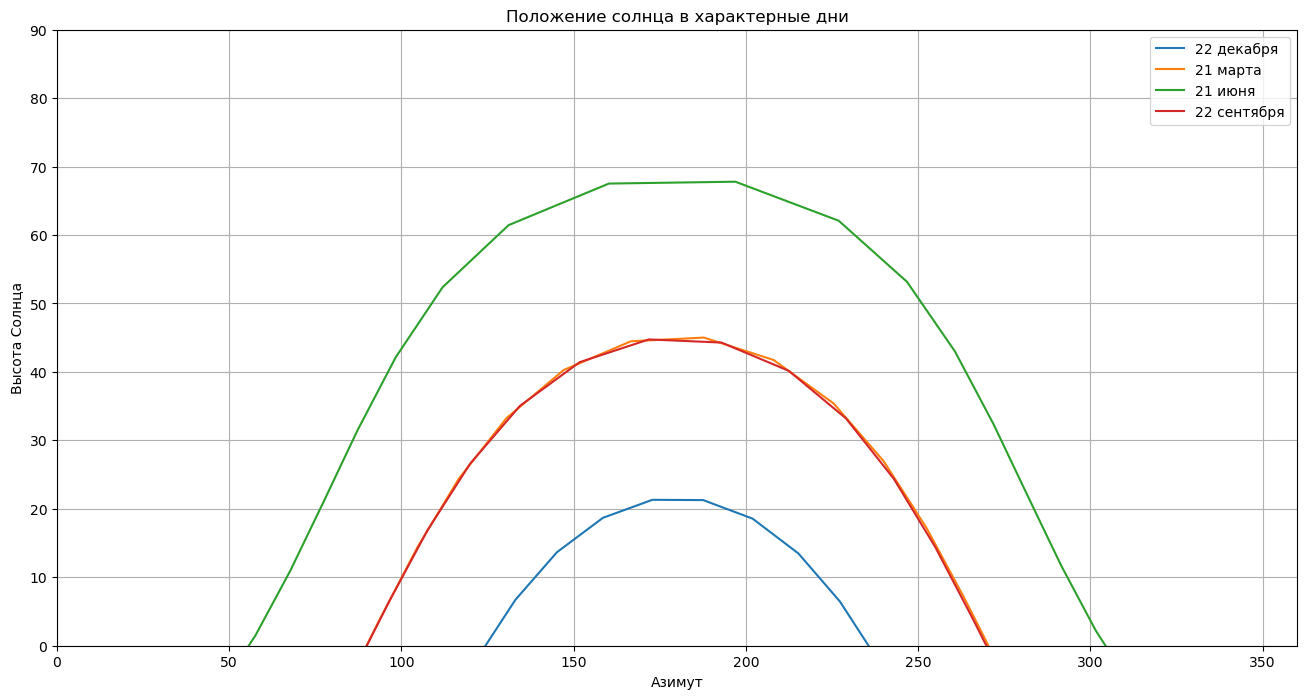

<Figure size 1600x800 with 0 Axes>

In [7]:
DOY_winter = 356
SPA_winter = SPA.iloc[(DOY_winter - 1) * 24 : DOY_winter * 24]

DOY_spring = 80
SPA_spring = SPA.iloc[(DOY_spring - 1) * 24 : DOY_spring * 24]

DOY_summer = 172
SPA_summer = SPA.iloc[(DOY_summer - 1) * 24 : DOY_summer * 24]

DOY_autumn = 266
SPA_autumn = SPA.iloc[(DOY_autumn - 1) * 24 : DOY_autumn * 24]

plt.figure(figsize = (16,8))
plt.plot(SPA_winter['azimuth'],SPA_winter['elevation'], label = '22 декабря')
plt.plot(SPA_spring['azimuth'],SPA_spring['elevation'], label = '21 марта')
plt.plot(SPA_summer['azimuth'],SPA_summer['elevation'], label = '21 июня')
plt.plot(SPA_autumn['azimuth'],SPA_autumn['elevation'], label = '22 сентября')
plt.xlabel('Азимут')
plt.ylabel('Высота Солнца') 
plt.grid(10)
plt.ylim(0,90)
plt.xlim(0,360)
plt.legend()
plt.title('Положение солнца в характерные дни')
plt.figure(figsize = (16,8))
plt.show()

## Заатмосферная солнечная радиация:

In [8]:
DNI_extra = pvlib.irradiance.get_extra_radiation(times_loc, 
                                                  solar_constant=1370, 
                                                  method='asce')
DNI_extra

2023-01-01 00:00:00+03:00    1415.210000
2023-01-01 01:00:00+03:00    1415.210000
2023-01-01 02:00:00+03:00    1415.210000
2023-01-01 03:00:00+03:00    1415.203302
2023-01-01 04:00:00+03:00    1415.203302
                                ...     
2023-12-31 19:00:00+03:00    1415.210000
2023-12-31 20:00:00+03:00    1415.210000
2023-12-31 21:00:00+03:00    1415.210000
2023-12-31 22:00:00+03:00    1415.210000
2023-12-31 23:00:00+03:00    1415.210000
Length: 8760, dtype: float64

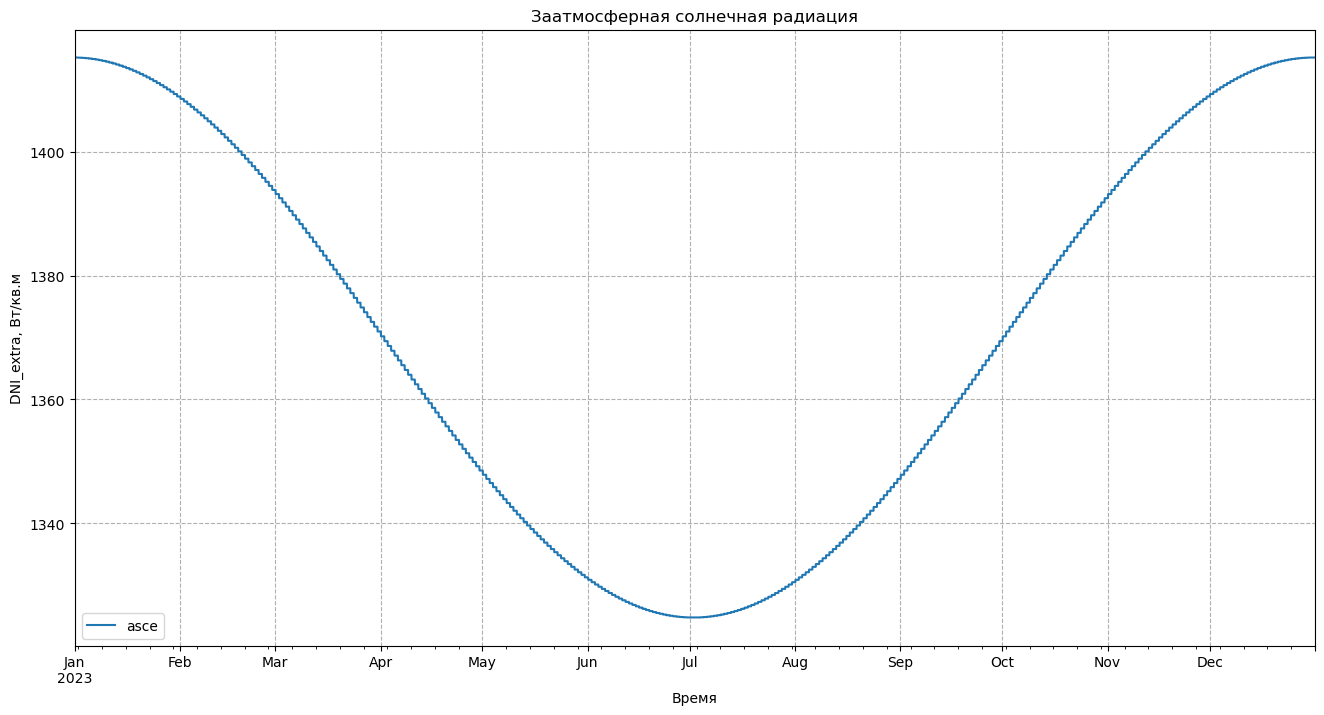

In [9]:
DNI_extra.plot(label='asce', figsize=(16, 8))
plt.grid(linestyle='--')
plt.legend()
plt.ylabel('DNI_extra, Вт/кв.м')
plt.xlabel('Время')
plt.title('Заатмосферная солнечная радиация')
plt.show()

## Месячные суммы заатмосферного излучения:

            DNI_extra
Январь    1051.285009
Февраль    942.006623
Март      1028.525745
Апрель     978.649741
Май        996.184936
Июнь       955.441641
Июль       987.054053
Август     995.675961
Сентябрь   977.979298
Октябрь   1027.836673
Ноябрь    1009.162165
Декабрь   1051.398156


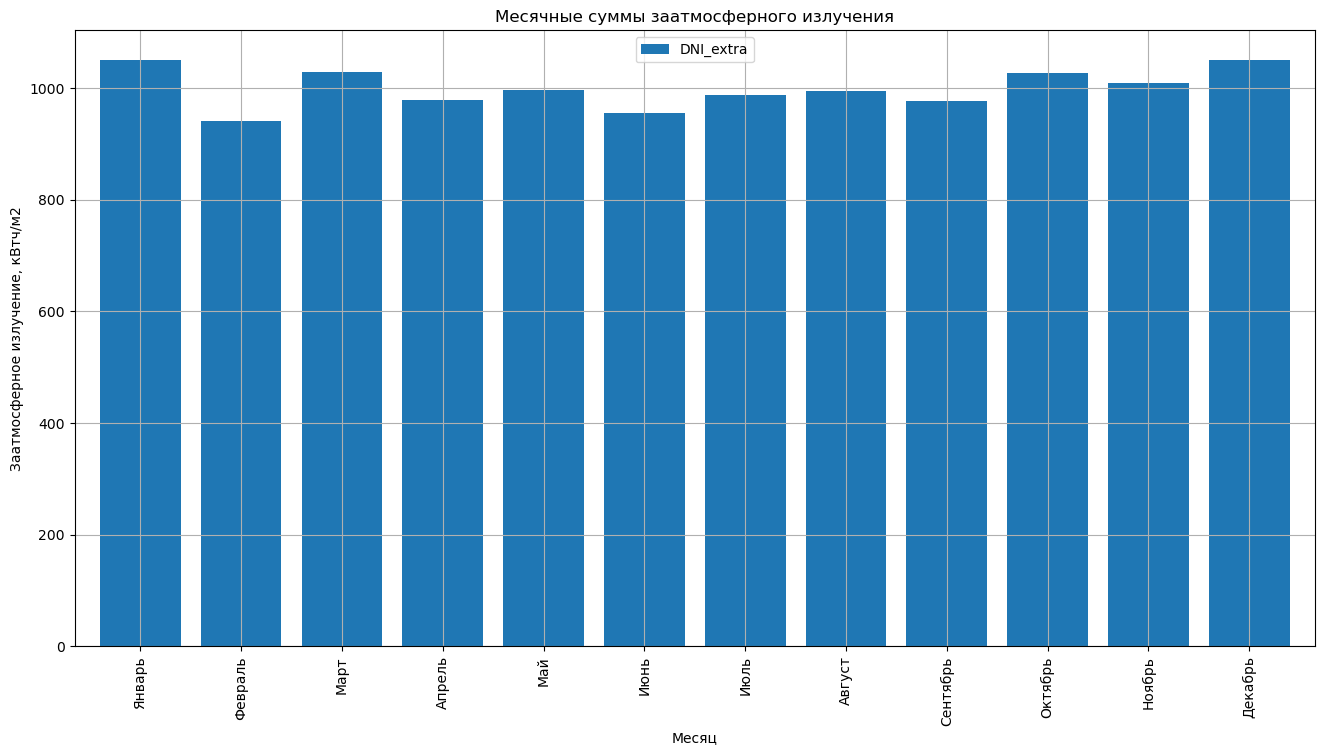

In [10]:
ZA = len(DNI_extra)

MonthSum_DNI_extra = [0.0] * 12

months_array = ['Январь','Февраль','Март','Апрель','Май','Июнь','Июль','Август','Сентябрь','Октябрь','Ноябрь','Декабрь']

for i in range (ZA):
    month = int(DNI_extra.index[i].to_pydatetime().strftime('%m'))
    MonthSum_DNI_extra[month - 1] += float(DNI_extra.iloc[i] / 1000)
    
pd_transf_DNI_extra = {'DNI_extra': MonthSum_DNI_extra}
pd_month_DNI_extra = pd.DataFrame(pd_transf_DNI_extra, index = months_array)
print(pd_month_DNI_extra)

pd_month_DNI_extra.plot(kind = 'bar', figsize = (16,8), width = 0.8)
plt.xlabel('Месяц')
plt.ylabel('Заатмосферное излучение, кВтч/м2') 
plt.grid()
plt.title('Месячные суммы заатмосферного излучения')
plt.show()

## Простая модель Солнечного Излучения:

In [11]:
airmass_relative = pvlib.atmosphere.get_relative_airmass(SPA['zenith'], model='kastenyoung1989')

airmass_absolute = pvlib.atmosphere.get_absolute_airmass(airmass_relative, pressure=101592)

linke_turbidity = pvlib.clearsky.lookup_linke_turbidity(times_loc, A.latitude, A.longitude, filepath=None, interp_turbidity=True)

SCS = pvlib.clearsky.ineichen(SPA['apparent_zenith'], 
                        airmass_absolute, 
                        linke_turbidity, 
                        altitude=A.altitude, 
                        dni_extra=DNI_extra, 
                        perez_enhancement=False)

SCS

,ghi,dni,dhi
2023-01-01 00:00:00+03:00,0.0,0.0,0.0
2023-01-01 01:00:00+03:00,0.0,0.0,0.0
2023-01-01 02:00:00+03:00,0.0,0.0,0.0
2023-01-01 03:00:00+03:00,0.0,0.0,0.0
2023-01-01 04:00:00+03:00,0.0,0.0,0.0
...,...,...,...
2023-12-31 19:00:00+03:00,0.0,0.0,0.0
2023-12-31 20:00:00+03:00,0.0,0.0,0.0
2023-12-31 21:00:00+03:00,0.0,0.0,0.0
2023-12-31 22:00:00+03:00,0.0,0.0,0.0


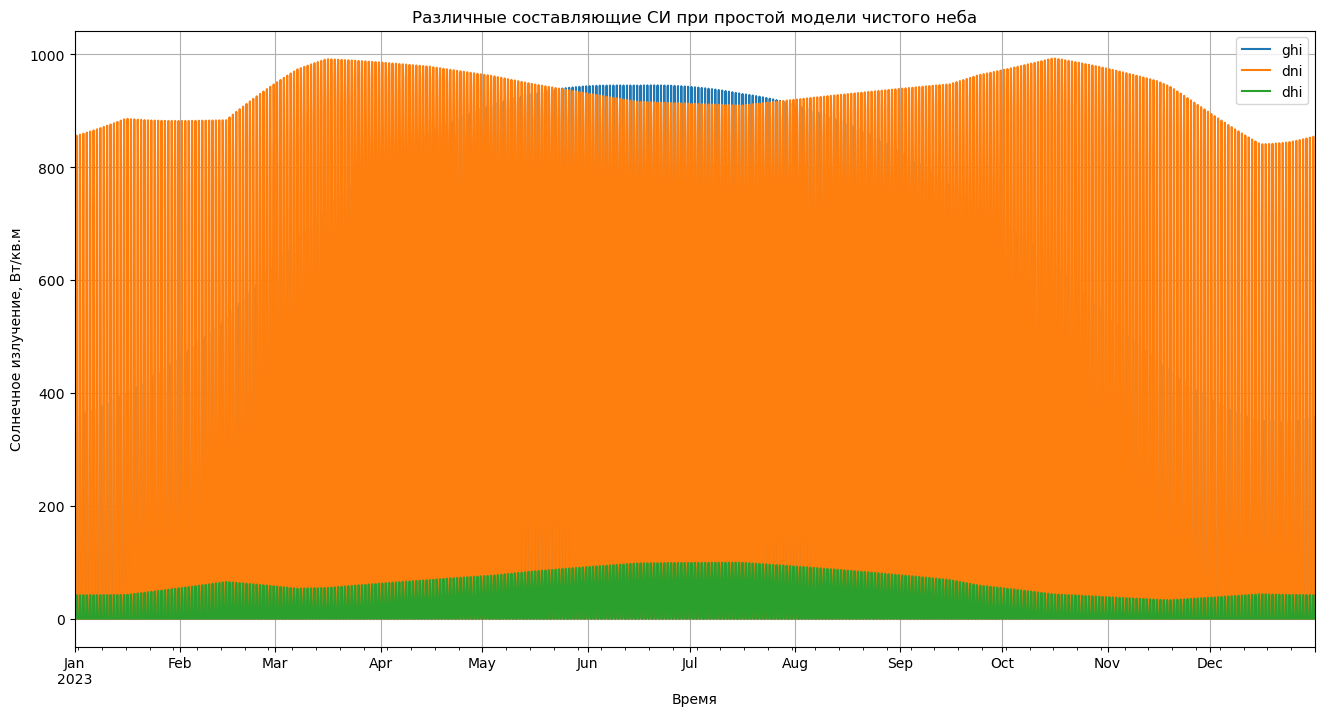

In [12]:
SCS.plot(figsize = (16,8))
plt.xlabel('Время')
plt.ylabel('Солнечное излучение, Вт/кв.м') 
plt.grid()
plt.title('Различные составляющие СИ при простой модели чистого неба')
plt.show()

## Модель ClearSky посложнее:

In [13]:
aoi = pvlib.irradiance.aoi(0, 180, SPA.zenith, SPA.azimuth)

poa_ground_diffuse = pvlib.irradiance.get_ground_diffuse(0, SCS.ghi, albedo=0.25, surface_type=None)

CS = pvlib.irradiance.poa_components ( aoi , SCS.dni , SCS.dhi , poa_ground_diffuse )
CS

,poa_global,poa_direct,poa_diffuse,poa_sky_diffuse,poa_ground_diffuse
2023-01-01 00:00:00+03:00,0.0,0.0,0.0,0.0,0.0
2023-01-01 01:00:00+03:00,0.0,0.0,0.0,0.0,0.0
2023-01-01 02:00:00+03:00,0.0,0.0,0.0,0.0,0.0
2023-01-01 03:00:00+03:00,0.0,0.0,0.0,0.0,0.0
2023-01-01 04:00:00+03:00,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
2023-12-31 19:00:00+03:00,0.0,0.0,0.0,0.0,0.0
2023-12-31 20:00:00+03:00,0.0,0.0,0.0,0.0,0.0
2023-12-31 21:00:00+03:00,0.0,0.0,0.0,0.0,0.0
2023-12-31 22:00:00+03:00,0.0,0.0,0.0,0.0,0.0


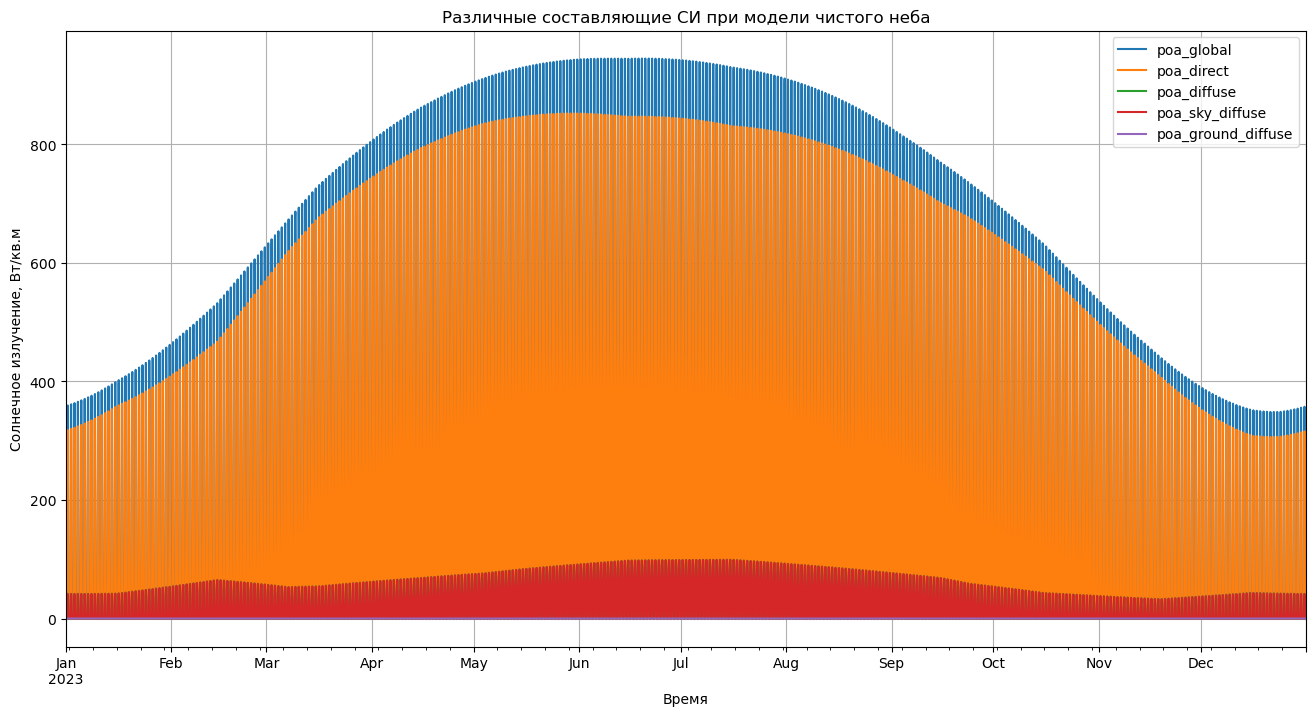

In [14]:
CS.plot(figsize = (16,8))
plt.xlabel('Время')
plt.ylabel('Солнечное излучение, Вт/кв.м') 
plt.grid()
plt.title('Различные составляющие СИ при модели чистого неба')
plt.show()

## Реальные данные СИ из базы данных PVGIS:

In [15]:
PVGIS_data, PVGIS_inputs, PVGIS_metadata = pvlib.iotools.get_pvgis_hourly(A.latitude, 
                               A.longitude, 
                               start=2023, 
                               end=2023, 
                               raddatabase=None, 
                               components=True, 
                               surface_tilt=0, 
                               surface_azimuth=180, 
                               outputformat='json', 
                               usehorizon=True, 
                               userhorizon=None, 
                               pvcalculation=False, 
                               peakpower=None, 
                               pvtechchoice='crystSi', 
                               mountingplace='free', 
                               loss=0, 
                               trackingtype=0, 
                               optimal_surface_tilt=False, 
                               optimalangles=False, 
                               url='https://re.jrc.ec.europa.eu/api/', 
                               map_variables=True, 
                               timeout=30)

PVGIS_data['ghi'] = PVGIS_data['poa_direct'] + PVGIS_data['poa_sky_diffuse'] 

PVGIS_data['time'] = times_loc

PVGIS_data = PVGIS_data.set_index('time')

PVGIS_data['dni'] = pvlib.irradiance.disc(ghi = PVGIS_data['ghi'],
                      solar_zenith = SPA['zenith'],
                      datetime_or_doy = PVGIS_data.index)['dni']

PVGIS_data

,poa_direct,poa_sky_diffuse,poa_ground_diffuse,solar_elevation,temp_air,wind_speed,Int,ghi,dni
time,,,,,,,,,
2023-01-01 00:00:00+03:00,0.0,0.0,0.0,0.0,8.91,2.90,0,0.0,0.0
2023-01-01 01:00:00+03:00,0.0,0.0,0.0,0.0,8.82,3.31,0,0.0,0.0
2023-01-01 02:00:00+03:00,0.0,0.0,0.0,0.0,8.77,3.59,0,0.0,0.0
2023-01-01 03:00:00+03:00,0.0,0.0,0.0,0.0,8.78,3.72,0,0.0,0.0
2023-01-01 04:00:00+03:00,0.0,0.0,0.0,0.0,8.86,4.00,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00+03:00,0.0,0.0,0.0,0.0,5.71,0.76,0,0.0,0.0
2023-12-31 20:00:00+03:00,0.0,0.0,0.0,0.0,5.15,1.10,0,0.0,0.0
2023-12-31 21:00:00+03:00,0.0,0.0,0.0,0.0,4.29,1.31,0,0.0,0.0


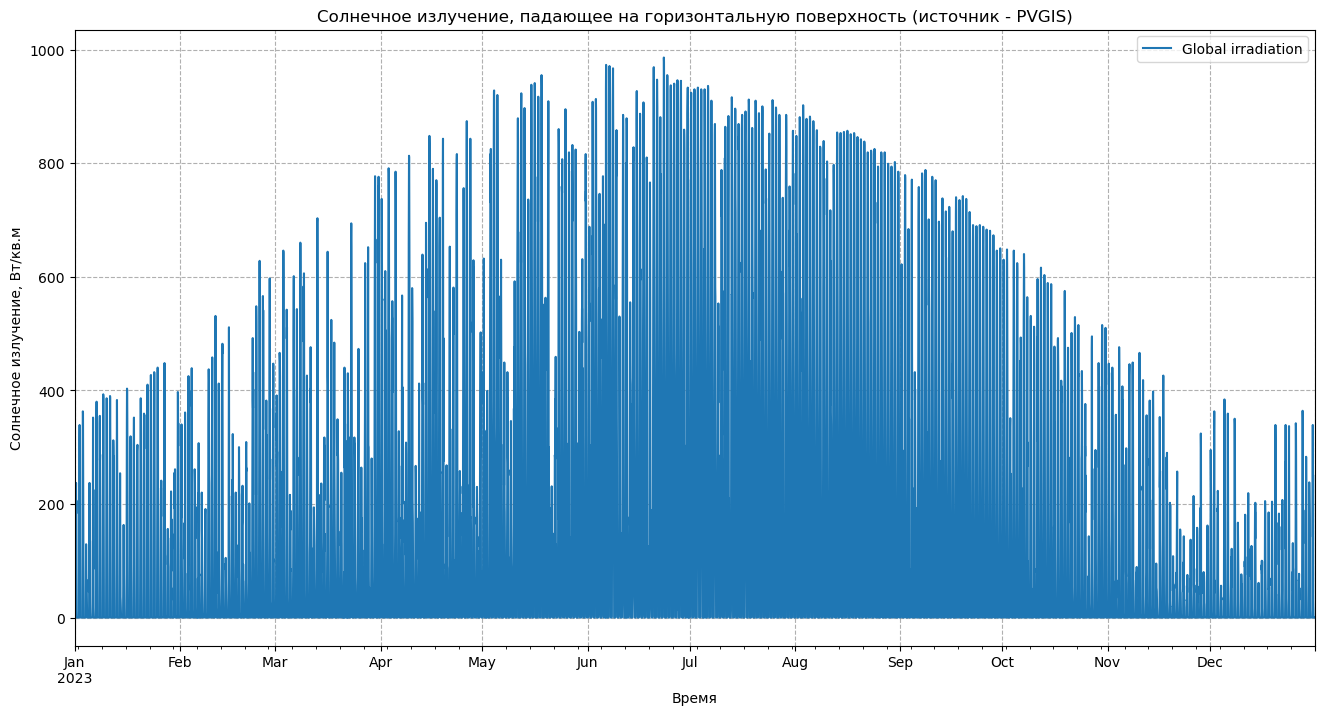

In [16]:
PVGIS_data['ghi'].plot(label='Global irradiation', figsize=(16, 8))
plt.legend()
plt.grid(linestyle='--')
plt.ylabel('Солнечное излучение, Вт/кв.м')
plt.xlabel('Время')
plt.title('Cолнечное излучение, падающее на горизонтальную поверхность (источник - PVGIS)')
plt.show()

## График изменения солнечного излучения за первые сутки года по данным БД PVGIS:

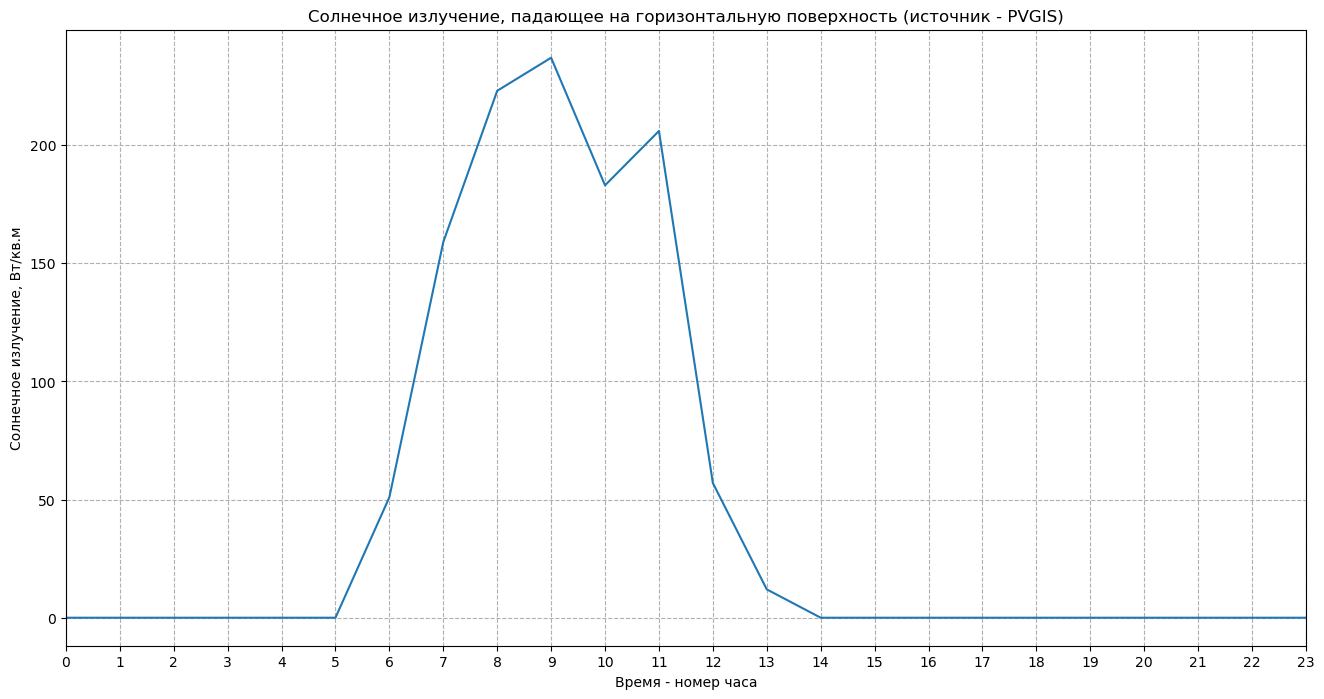

In [17]:
y = PVGIS_data.iloc[0:24, [7]]
x = range(24)
plt.figure(figsize=(16, 8))
plt.plot(x, y)
plt.grid(linestyle='--')
plt.ylabel('Солнечное излучение, Вт/кв.м')
plt.xlabel('Время - номер часа')
plt.title('Cолнечное излучение, падающее на горизонтальную поверхность (источник - PVGIS)')
plt.xlim(0, 23)
plt.xticks(range(0, 24, 1))
plt.show()

## Реальные данные СИ из базы данных NASA:

In [18]:
NASA_data = pd.read_csv('NASAdate_Chem.csv', sep=',', skiprows=12, header=0)
NASA_data['time'] = times_loc
NASA_data = NASA_data.set_index('time')
NASA_data

,YEAR,MO,DY,HR,ALLSKY_SFC_SW_DWN,ALLSKY_SFC_SW_DNI,ALLSKY_SFC_SW_DIFF,T2M
time,,,,,,,,
2023-01-01 00:00:00+03:00,2023,1,1,0,0.0,0.0,0.0,10.45
2023-01-01 01:00:00+03:00,2023,1,1,1,0.0,0.0,0.0,10.49
2023-01-01 02:00:00+03:00,2023,1,1,2,0.0,0.0,0.0,10.52
2023-01-01 03:00:00+03:00,2023,1,1,3,0.0,0.0,0.0,10.56
2023-01-01 04:00:00+03:00,2023,1,1,4,0.0,0.0,0.0,10.61
...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00+03:00,2023,12,31,19,0.0,0.0,0.0,10.63
2023-12-31 20:00:00+03:00,2023,12,31,20,0.0,0.0,0.0,10.50
2023-12-31 21:00:00+03:00,2023,12,31,21,0.0,0.0,0.0,10.37


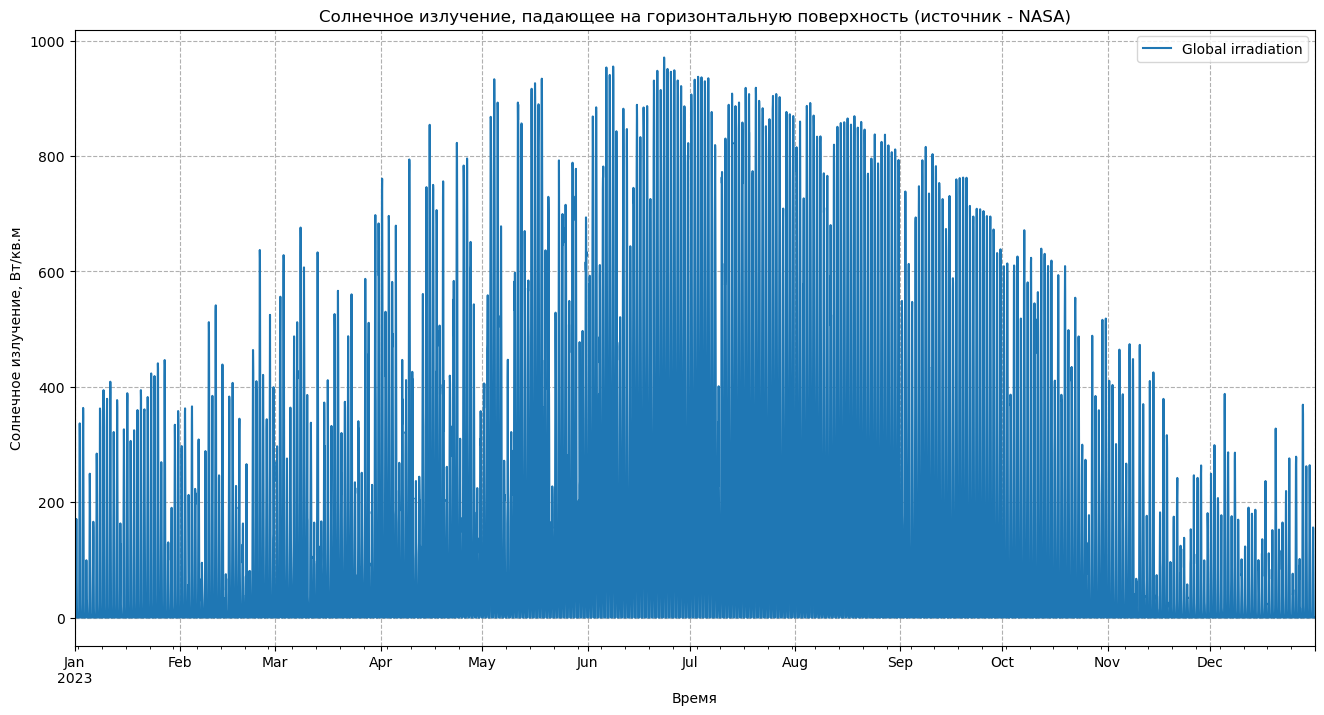

In [19]:
NASA_data['ALLSKY_SFC_SW_DWN'].plot(label='Global irradiation', figsize=(16, 8))
plt.legend()
plt.grid(linestyle='--')
plt.ylabel('Солнечное излучение, Вт/кв.м')
plt.xlabel('Время')
plt.title('Cолнечное излучение, падающее на горизонтальную поверхность (источник - NASA)')
plt.show()

## График изменения солнечного излучения за первые сутки года по данным БД NASA:

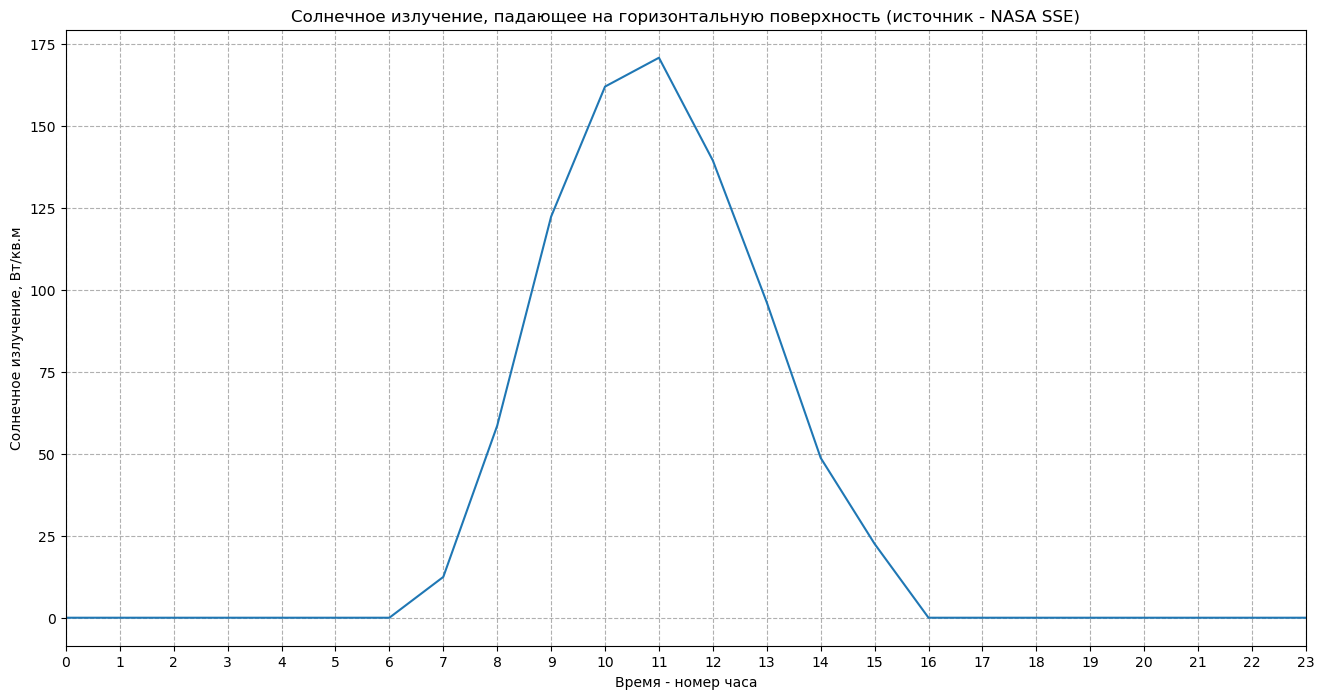

In [20]:
y = NASA_data.iloc[0:24, [4]]
x = range(24)
plt.figure(figsize=(16, 8))
plt.plot(x, y)
plt.grid(linestyle='--')
plt.ylabel('Солнечное излучение, Вт/кв.м')
plt.xlabel('Время - номер часа')
plt.title('Cолнечное излучение, падающее на горизонтальную поверхность (источник - NASA SSE)')
plt.xlim(0, 23)
plt.xticks(range(0, 24, 1))
plt.show()

## 

## Данные PVSYST:

In [21]:
PVSYST_data = pd.read_csv('PVSYSTdataChemburka.pvsyst', sep='\t', skiprows=12, header=0)
PVSYST_data['time'] = times_loc
PVSYST_data = PVSYST_data.set_index('time')
PVSYST_data

,Year,Month,Day,Hour,Minute,GHI,DHI,DNI,Tamb,WindVel,WindDir
time,,,,,,,,,,,
2023-01-01 00:00:00+03:00,2023,1,1,1,30,0,0,0,9.0,8.0,180
2023-01-01 01:00:00+03:00,2023,1,1,2,30,0,0,0,9.0,8.0,176
2023-01-01 02:00:00+03:00,2023,1,1,3,30,0,0,0,8.0,11.0,174
2023-01-01 03:00:00+03:00,2023,1,1,4,30,0,0,0,8.0,11.0,172
2023-01-01 04:00:00+03:00,2023,1,1,5,30,0,0,0,8.0,12.0,176
...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00+03:00,2023,12,31,20,30,0,0,0,11.0,9.0,201
2023-12-31 20:00:00+03:00,2023,12,31,21,30,0,0,0,11.0,10.0,211
2023-12-31 21:00:00+03:00,2023,12,31,22,30,0,0,0,11.0,10.0,216


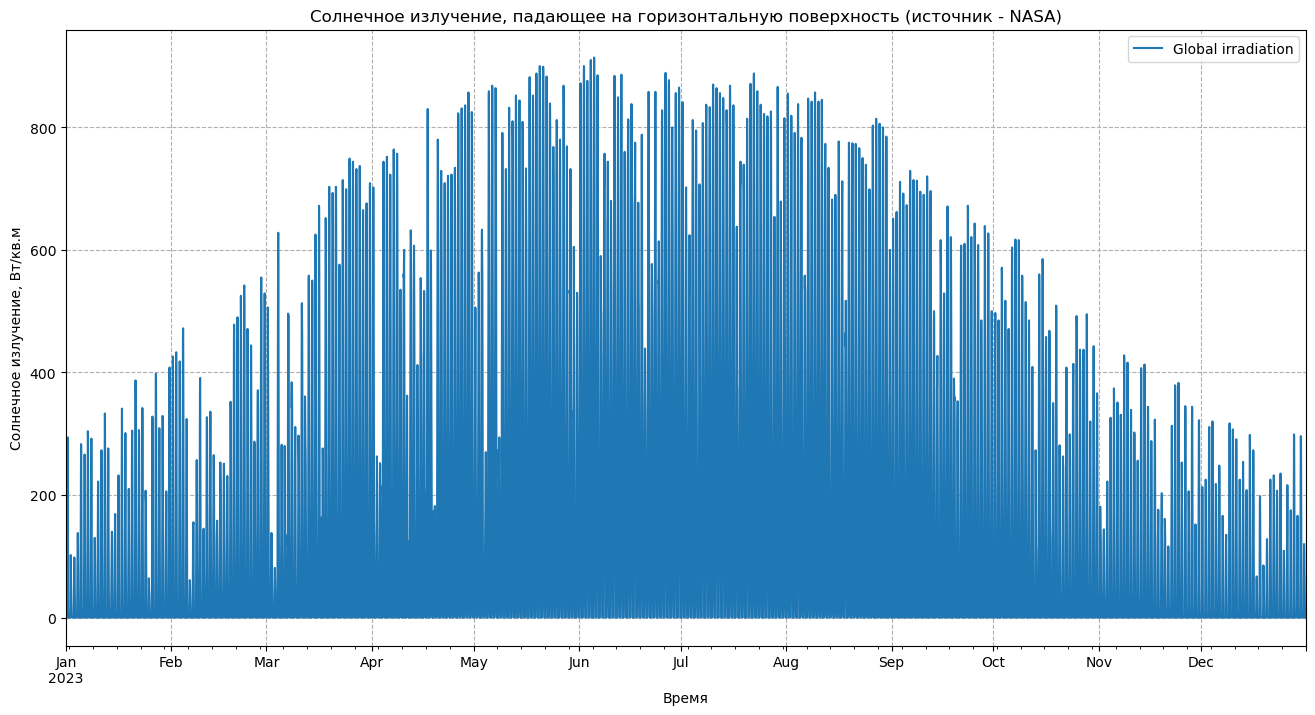

In [22]:
PVSYST_data['GHI'].plot(label='Global irradiation', figsize=(16, 8))
plt.legend()
plt.grid(linestyle='--')
plt.ylabel('Солнечное излучение, Вт/кв.м')
plt.xlabel('Время')
plt.title('Cолнечное излучение, падающее на горизонтальную поверхность (источник - NASA)')
plt.show()

## График изменения солнечного излучения за первые сутки года по данным PVSYST:

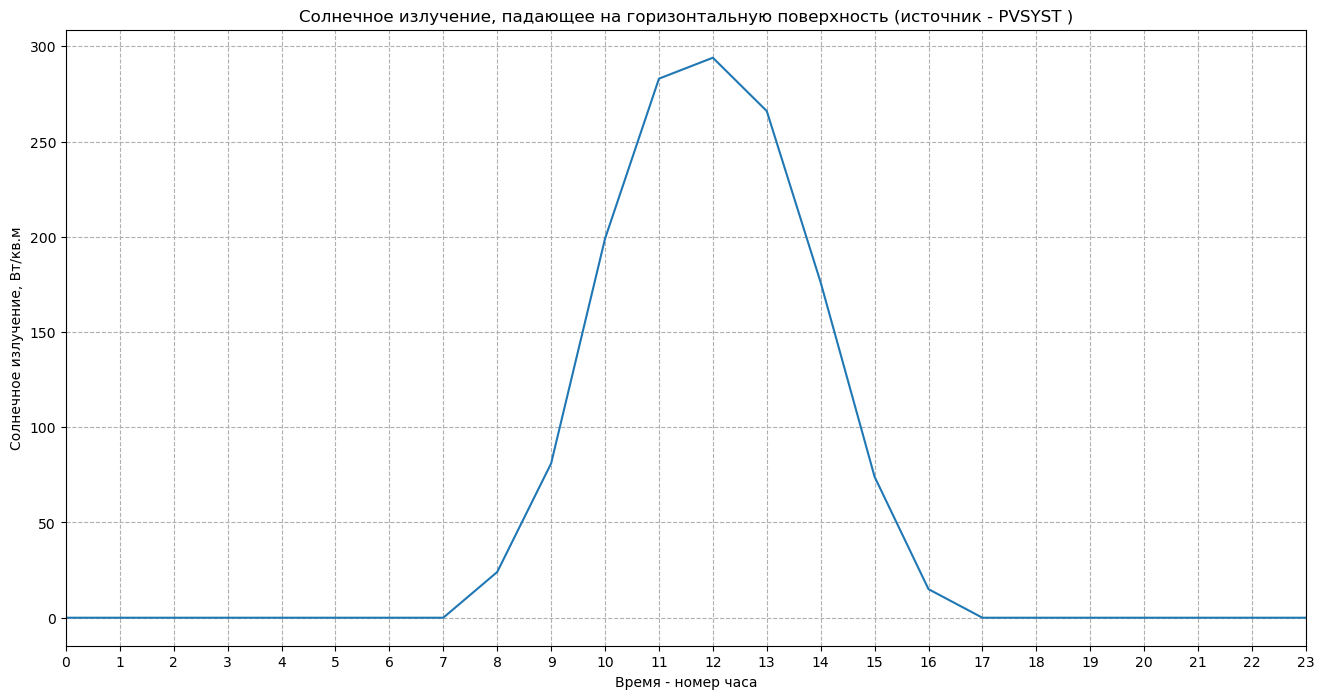

In [23]:
y = PVSYST_data.iloc[0:24, [5]]
x = range(24)
plt.figure(figsize=(16, 8))
plt.plot(x, y)
plt.grid(linestyle='--')
plt.ylabel('Солнечное излучение, Вт/кв.м')
plt.xlabel('Время - номер часа')
plt.title('Cолнечное излучение, падающее на горизонтальную поверхность (источник - PVSYST )')
plt.xlim(0, 23)
plt.xticks(range(0, 24, 1))
plt.show()

## Сравнение данных Модели SCS c данными БД PVGIS, БД NASA, PVSYST:

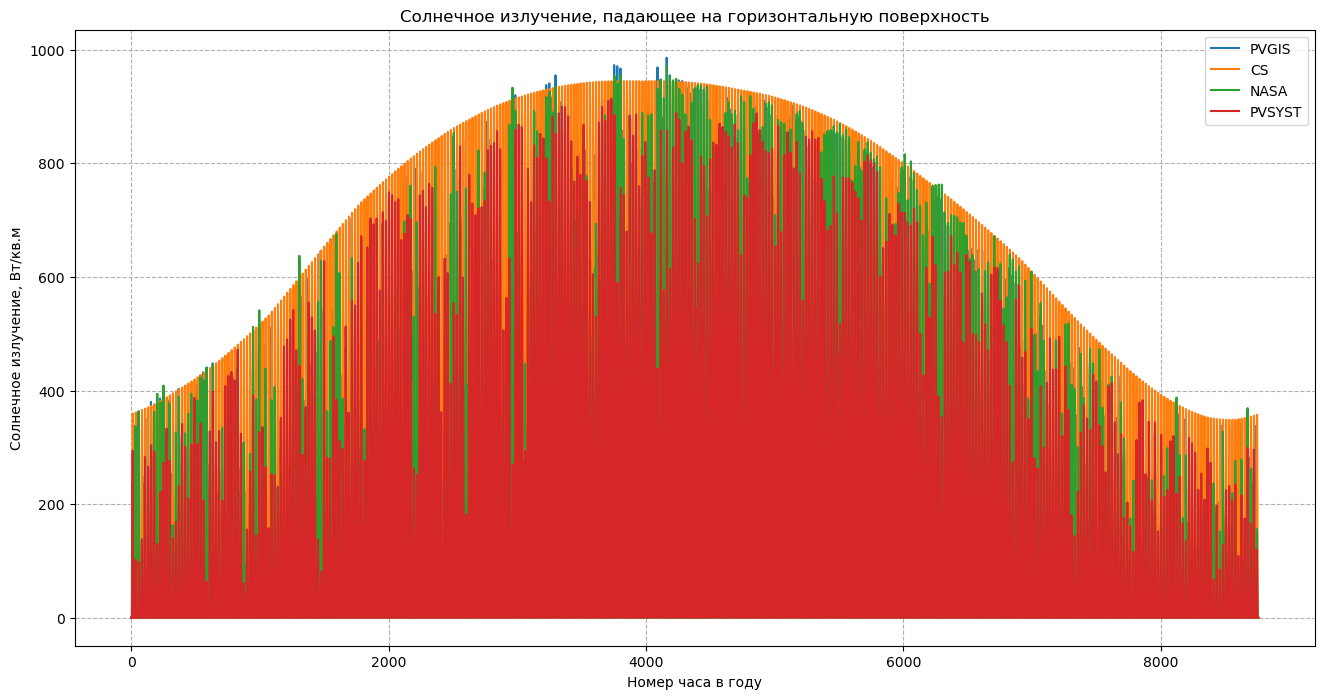

In [24]:
y1 = CS['poa_global'].values
y2 = PVGIS_data['ghi'].values
y3 = NASA_data['ALLSKY_SFC_SW_DWN'].values
y4 = PVSYST_data['GHI'].values
x = range(8760)
plt.figure(figsize=(16, 8))
plt.plot(x, y2, label='PVGIS')
plt.plot(x, y1, label='CS')
plt.plot(x, y3, label='NASA')
plt.plot(x, y4, label='PVSYST')
plt.legend()
plt.grid(linestyle='--')
plt.ylabel('Солнечное излучение, Вт/кв.м')
plt.xlabel('Номер часа в году')
plt.title('Cолнечное излучение, падающее на горизонтальную поверхность')
plt.show()

## Месячные суммы суммарного СИ PVGIS, PVSYST, NASA и CS на горизонтальную поверхность:

              PVGIS          CS       NASA   PVSYST
Январь     52.78825   68.540943   52.41259   42.258
Февраль    54.13144   93.578873   51.73045   60.419
Март       86.08052  161.139206   82.57377  114.495
Апрель    116.22344  207.316934  118.32544  149.214
Май       164.50674  249.428933  163.12989  192.233
Июнь      204.04899  253.403191  215.43922  206.625
Июль      221.62347  252.620251  226.26275  209.446
Август    201.86432  223.112258  202.94734  188.913
Сентябрь  145.83403  172.236127  150.69560  133.989
Октябрь    94.48138  128.057608  100.17665   90.811
Ноябрь     40.18228   78.959924   41.50695   49.113
Декабрь    29.33946   58.488005   30.63472   34.420


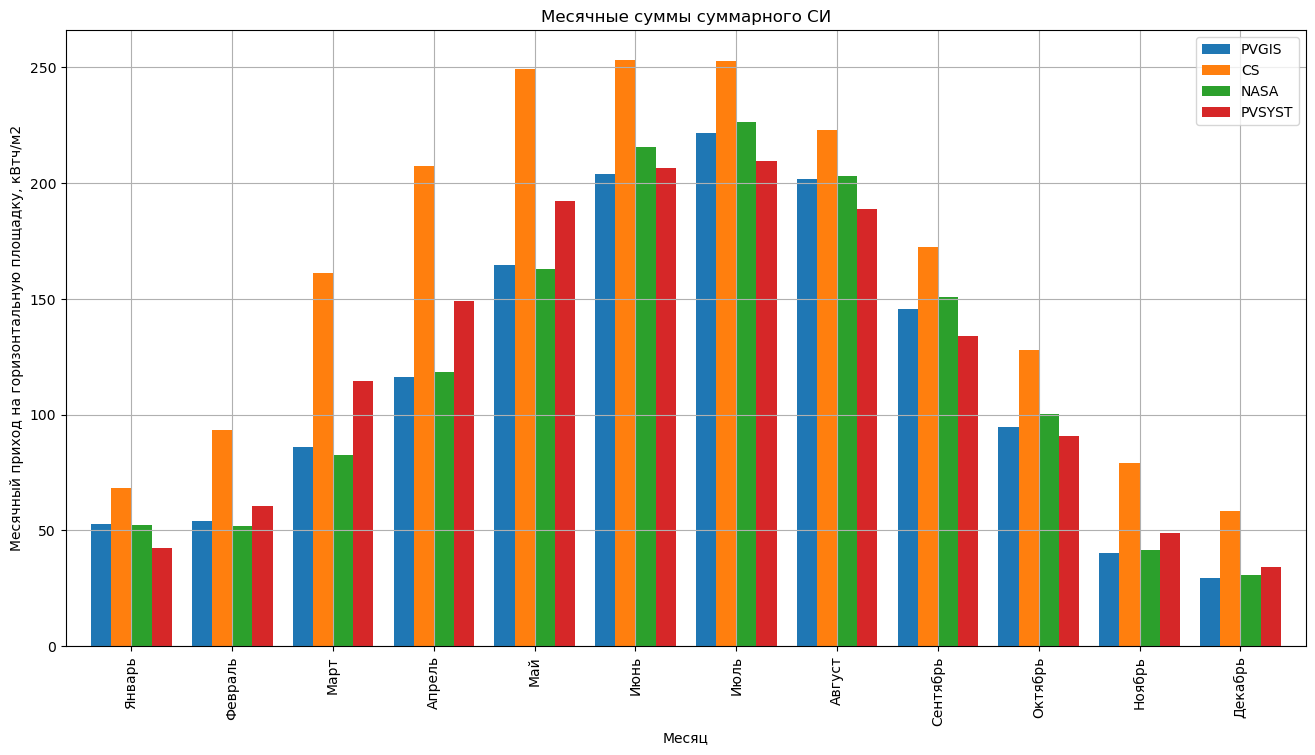

In [25]:
lendata = len(PVGIS_data)

MonthSum_PVGIS_ghi = [0.0] * 12
MonthSum_CS_ghi = [0.0] * 12
MonthSum_NASA_ghi = [0.0] * 12
MonthSum_PVSYST_ghi = [0.0] * 12

months_array = ['Январь','Февраль','Март','Апрель','Май','Июнь','Июль','Август','Сентябрь','Октябрь','Ноябрь','Декабрь']

for i in range (lendata):
    month = int(PVGIS_data.index[i].to_pydatetime().strftime('%m'))
    MonthSum_PVGIS_ghi[month - 1] += float(PVGIS_data.iloc[i , 7] / 1000)
    MonthSum_CS_ghi[month - 1] += float(CS.iloc[i, 0] / 1000)
    MonthSum_NASA_ghi[month - 1] += float(NASA_data.iloc[i, 4] / 1000)
    MonthSum_PVSYST_ghi[month - 1] += float(PVSYST_data.iloc[i, 5] / 1000)

pd_transf_GHI = {'PVGIS': MonthSum_PVGIS_ghi,
            'CS': MonthSum_CS_ghi,
            'NASA': MonthSum_NASA_ghi,
                'PVSYST': MonthSum_PVSYST_ghi}
pd_month_GHI = pd.DataFrame(pd_transf_GHI, index = months_array)
print(pd_month_GHI)

pd_month_GHI.plot(kind = 'bar', figsize = (16,8), width = 0.8)
plt.xlabel('Месяц')
plt.ylabel('Месячный приход на горизонтальную площадку, кВтч/м2') 
plt.grid()
plt.title('Месячные суммы суммарного СИ')
plt.show()   

## Суммарная СИ за год для PVGIS, PVSYST, NASA и CS:

In [26]:
MonthSum_PVGIS_ghi = sum(pd_month_GHI['PVGIS'])
MonthSum_CS_ghi = sum(pd_month_GHI['CS'])
MonthSum_NASA_ghi = sum(pd_month_GHI['NASA'])
MonthSum_PVSYST_ghi = sum(pd_month_GHI['PVSYST'])

print('PVGIS:  ', MonthSum_PVGIS_ghi)
print('CS:  ', MonthSum_CS_ghi)
print('NASA:  ', MonthSum_NASA_ghi)
print('PVSYST:  ', MonthSum_PVSYST_ghi)

PVGIS:   1411.1043200000004
CS:   1946.8822529200775
NASA:   1435.8353700000002
PVSYST:   1471.9360000000004


## Месячные суммы диффузного СИ PVGIS, PVSYST, NASA и CS на горизонтальную поверхность:

             PVGIS         CS      NASA  PVSYST
Январь    23.69500   8.922790  27.96922  24.206
Февраль   31.93483  12.377078  34.25746  30.943
Март      51.59598  13.533740  51.57262  42.741
Апрель    65.49300  18.284084  66.51113  54.079
Май       77.97740  26.651617  82.90771  62.927
Июнь      72.20368  31.283368  71.89323  61.078
Июль      70.53000  32.098658  63.28356  57.988
Август    60.42106  25.990455  50.87428  49.748
Сентябрь  51.09253  17.372970  42.52405  42.614
Октябрь   42.55216   9.321419  40.19774  35.656
Ноябрь    23.04069   6.506731  24.59946  25.426
Декабрь   19.13506   7.824644  21.46774  19.318


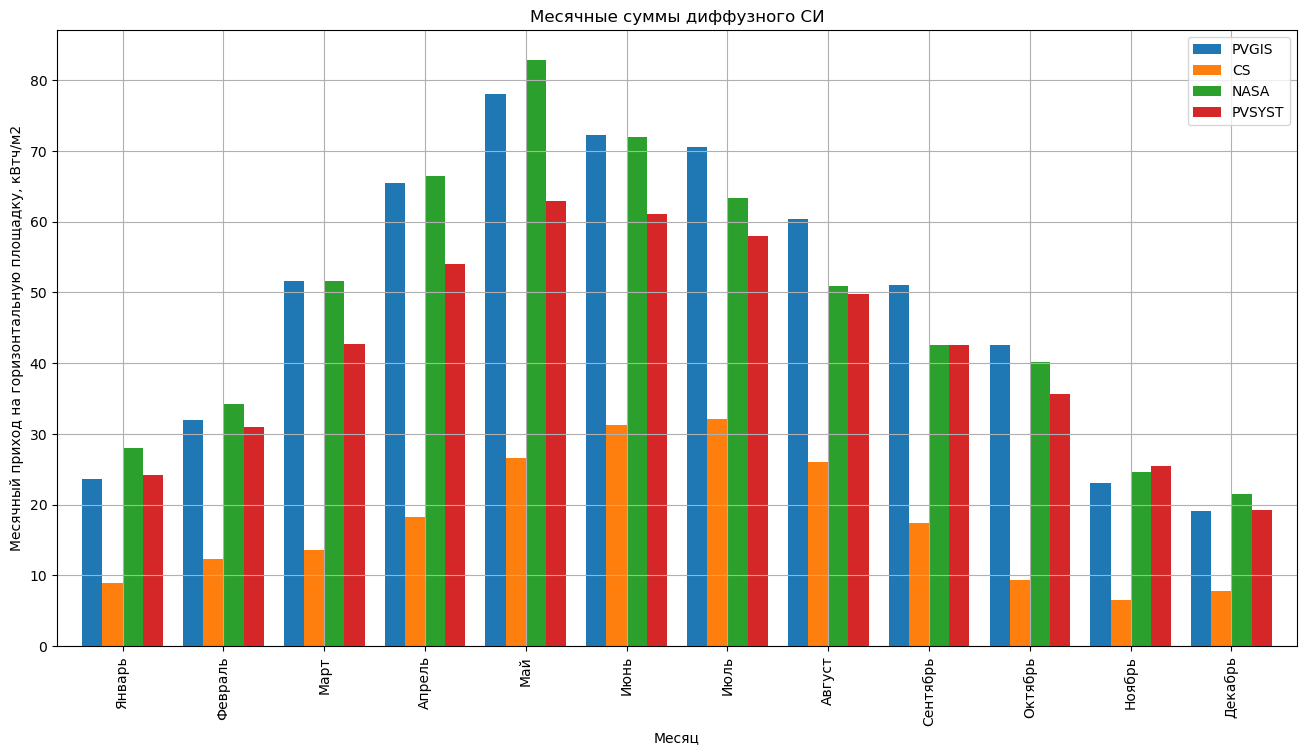

In [27]:
MonthSum_PVGIS_dhi = [0.0] * 12
MonthSum_CS_dhi = [0.0] * 12
MonthSum_NASA_dhi = [0.0] * 12
MonthSum_PVSYST_dhi = [0.0] * 12

months_array = ['Январь','Февраль','Март','Апрель','Май','Июнь','Июль','Август','Сентябрь','Октябрь','Ноябрь','Декабрь']

for i in range (lendata):
    month = int(PVGIS_data.index[i].to_pydatetime().strftime('%m'))
    MonthSum_PVGIS_dhi[month - 1] += float(PVGIS_data.iloc[i , 1] / 1000)
    MonthSum_CS_dhi[month - 1] += float(CS.iloc[i, 2] / 1000)
    MonthSum_NASA_dhi[month - 1] += float(NASA_data.iloc[i, 6] / 1000)
    MonthSum_PVSYST_dhi[month - 1] += float(PVSYST_data.iloc[i, 6] / 1000)

pd_transf = {'PVGIS': MonthSum_PVGIS_dhi,
            'CS': MonthSum_CS_dhi,
            'NASA': MonthSum_NASA_dhi,
            'PVSYST': MonthSum_PVSYST_dhi}
pd_month_DHI = pd.DataFrame(pd_transf, index = months_array)
print(pd_month_DHI)

pd_month_DHI.plot(kind = 'bar', figsize = (16,8), width = 0.8)
plt.xlabel('Месяц')
plt.ylabel('Месячный приход на горизонтальную площадку, кВтч/м2') 
plt.grid()
plt.title('Месячные суммы диффузного СИ')
plt.show()    

## Диффузная СИ за год для PVGIS, PVSYST, NASA и CS:

In [28]:
MonthSum_PVGIS_dhi = sum(pd_month_DHI['PVGIS'])
MonthSum_SCS_dhi = sum(pd_month_DHI['CS'])
MonthSum_NASA_dhi = sum(pd_month_DHI['NASA'])
MonthSum_PVSYST_dhi = sum(pd_month_DHI['PVSYST'])

print('PVGIS:  ', MonthSum_PVGIS_dhi)
print('SCS:  ', MonthSum_SCS_dhi)
print('NASA:  ', MonthSum_NASA_dhi)
print('PVSYST:  ', MonthSum_PVSYST_dhi)

PVGIS:   589.6713900000001
SCS:   210.16755300133357
NASA:   578.0581999999999
PVSYST:   506.72399999999993


## Сравнение данных с данными по методу Ангстрема:

In [29]:
MonthSum_Angstrem_ghi = [67.44, 101.1, 138.75, 
                          169.2, 212.24, 226.12, 
                          197.27, 199.51, 169.75, 
                          115.93, 76.74, 51.85] 
MonthSum_Angstrem_ghi

[67.44,
 101.1,
 138.75,
 169.2,
 212.24,
 226.12,
 197.27,
 199.51,
 169.75,
 115.93,
 76.74,
 51.85]

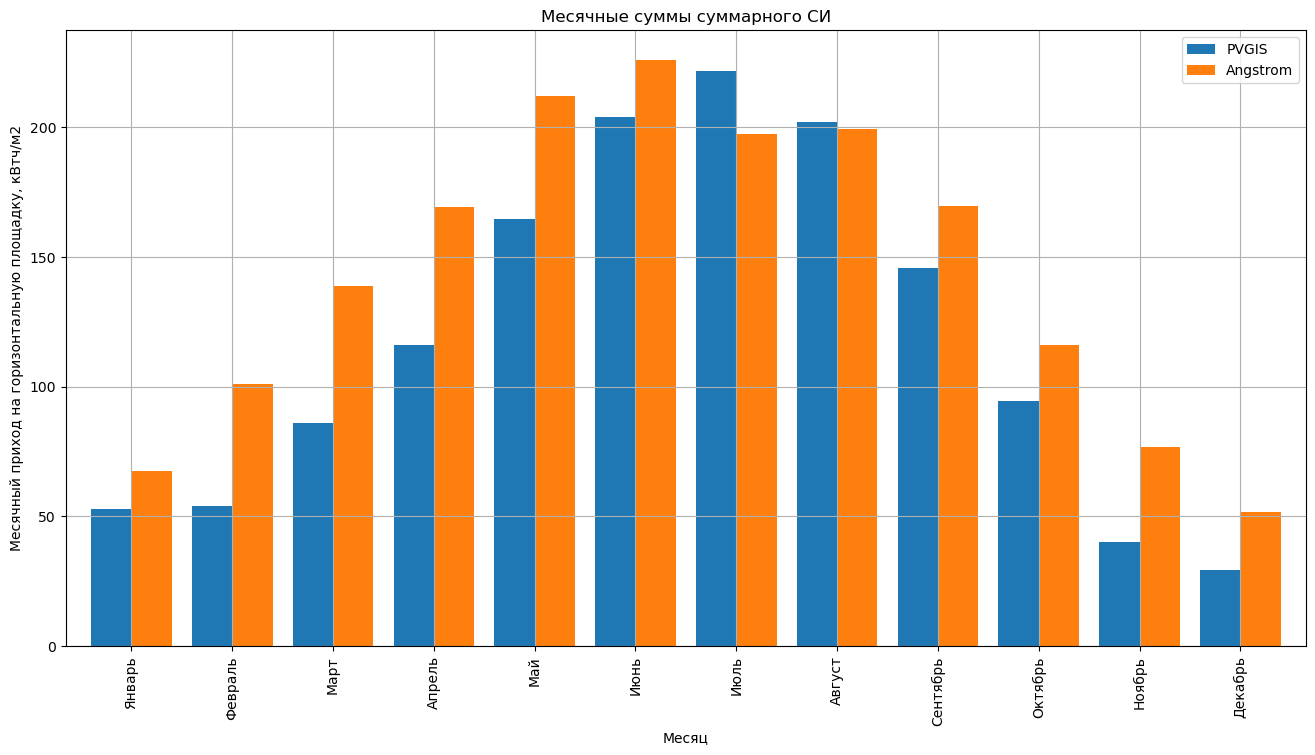

In [30]:
pd_month_GHI['Angstrom'] = MonthSum_Angstrem_ghi

pd_month_GHI.iloc[0 : len(pd_month_GHI), [0, 4]].plot(kind = 'bar', figsize = (16,8), width = 0.8)
plt.xlabel('Месяц')
plt.ylabel('Месячный приход на горизонтальную площадку, кВтч/м2') 
plt.grid()
plt.title('Месячные суммы суммарного СИ')
plt.legend()
plt.show()    

## Солнечное излучение, падающее на наклонную поверхность:

## Альбедо поверхности:

In [31]:
Albedo_month = [0.08, 0.08, 0.07,
    0.08, 0.09, 0.1,
    0.09, 0.08, 0.08, 
    0.08, 0.07, 0.07, 0.08]
Albedo_hour = [0] * lendata

for i in range (lendata):
    month = int(PVGIS_data.index[i].to_pydatetime().strftime('%m'))
    Albedo_hour[i] = Albedo_month[month - 1]

PVGIS_data['Albedo'] = Albedo_hour

In [32]:
PVGIS_data

,poa_direct,poa_sky_diffuse,poa_ground_diffuse,solar_elevation,temp_air,wind_speed,Int,ghi,dni,Albedo
time,,,,,,,,,,
2023-01-01 00:00:00+03:00,0.0,0.0,0.0,0.0,8.91,2.90,0,0.0,0.0,0.08
2023-01-01 01:00:00+03:00,0.0,0.0,0.0,0.0,8.82,3.31,0,0.0,0.0,0.08
2023-01-01 02:00:00+03:00,0.0,0.0,0.0,0.0,8.77,3.59,0,0.0,0.0,0.08
2023-01-01 03:00:00+03:00,0.0,0.0,0.0,0.0,8.78,3.72,0,0.0,0.0,0.08
2023-01-01 04:00:00+03:00,0.0,0.0,0.0,0.0,8.86,4.00,0,0.0,0.0,0.08
...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00+03:00,0.0,0.0,0.0,0.0,5.71,0.76,0,0.0,0.0,0.07
2023-12-31 20:00:00+03:00,0.0,0.0,0.0,0.0,5.15,1.10,0,0.0,0.0,0.07
2023-12-31 21:00:00+03:00,0.0,0.0,0.0,0.0,4.29,1.31,0,0.0,0.0,0.07


## Функция добавления столбца в датафрейм:

In [33]:
def create_df (columns, values, indexes):
    pd_transf = {}
    
    for i in range(len(columns)):
        pd_transf[str(columns[i])] = values[i]
    
    df = pd.DataFrame(pd_transf, index = indexes)
    df.fillna(0, inplace = True)

    return(df)

## Модель диффузного излучения (Perez, Isotropic, Klucher, Reindl):

### Perez:

In [34]:
surface_azimuth = 180
Tilts = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
Tilt_range = len(Tilts)
Diff_Perez = [0.0] * Tilt_range

for i in range (Tilt_range):
    Diff_Perez[i] = pvlib.irradiance.perez(surface_tilt = Tilts[i],
                                                 surface_azimuth = surface_azimuth,
                                                 dhi = PVGIS_data['poa_sky_diffuse'],
                                                 dni = PVGIS_data['dni'],
                                                 dni_extra = DNI_extra,
                                                 solar_zenith = SPA['apparent_zenith'],
                                                 solar_azimuth = SPA['azimuth'],
                                                 airmass = airmass_relative,
                                                 model = 'allsitescomposite1990',
                                                 return_components = False)

Perez_DiffData = create_df(Tilts, Diff_Perez, PVGIS_data.index)

Diff_YearSum = [0] * Tilt_range
for i in range(Tilt_range):
    Diff_YearSum[i] = sum(Perez_DiffData[str(Tilts[i])]) / 1000

Perez_YearData = pd.DataFrame(index = Tilts)
Perez_YearData['Diff_perez'] = Diff_YearSum

### Isotropic:

In [35]:
surface_azimuth = 180
Tilts = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
Tilt_range = len(Tilts)
DiffuseSky_isotropic = [0.0] * Tilt_range

for i in range (Tilt_range):
    DiffuseSky_isotropic[i] = pvlib.irradiance.isotropic(surface_tilt = Tilts[i],
                                                 dhi = PVGIS_data['poa_sky_diffuse'],
                                                )

isotropic_diffuse_sky_data = create_df(Tilts, DiffuseSky_isotropic, PVGIS_data.index)




Sky_diff_year_sum_isotropic = [0] * Tilt_range
for i in range(Tilt_range):
    Sky_diff_year_sum_isotropic[i] = sum(isotropic_diffuse_sky_data[str(Tilts[i])]) / 1000

isotropic_year_data = pd.DataFrame(index = Tilts)
isotropic_year_data['isotropic'] = Sky_diff_year_sum_isotropic

### Klucher:

In [36]:
surface_azimuth = 180
Tilts = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
Tilt_range = len(Tilts)
DiffuseSky_klucher = [0.0] * Tilt_range

for i in range (Tilt_range):
    DiffuseSky_klucher[i] = pvlib.irradiance.klucher(surface_tilt = Tilts[i],
                                                 surface_azimuth = surface_azimuth,
                                                 dhi = PVGIS_data['poa_sky_diffuse'],
                                                 ghi = PVGIS_data['poa_sky_diffuse'],
                                                 solar_zenith = SPA['apparent_zenith'],
                                                 solar_azimuth = SPA['azimuth'],
                                                )

klucher_diffuse_sky_data = create_df(Tilts, DiffuseSky_klucher, PVGIS_data.index)




Sky_diff_year_sum_klucher = [0] * Tilt_range
for i in range(Tilt_range):
    Sky_diff_year_sum_klucher[i] = sum(klucher_diffuse_sky_data[str(Tilts[i])]) / 1000

klucher_year_data = pd.DataFrame(index = Tilts)
klucher_year_data['klucher'] = Sky_diff_year_sum_klucher

### Reindl:

In [37]:
surface_azimuth = 180
Tilts = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]
Tilt_range = len(Tilts)
DiffuseSky_Reindl = [0.0] * Tilt_range

for i in range (Tilt_range):
    DiffuseSky_Reindl[i] = pvlib.irradiance.reindl(surface_tilt = Tilts[i],
                                                 surface_azimuth = surface_azimuth,
                                                 dhi = PVGIS_data['poa_sky_diffuse'],
                                                 dni = PVGIS_data['dni'],
                                                 ghi = PVGIS_data['ghi'],
                                                 dni_extra = DNI_extra,
                                                 solar_zenith = SPA['apparent_zenith'],
                                                 solar_azimuth = SPA['azimuth'],
                                                 )

Reindl_diffuse_sky_data = create_df(Tilts, DiffuseSky_Reindl, PVGIS_data.index)




Sky_diff_year_sum_Reindl = [0] * Tilt_range
for i in range(Tilt_range):
    Sky_diff_year_sum_Reindl[i] = sum(Reindl_diffuse_sky_data[str(Tilts[i])]) / 1000

Reindl_year_data = pd.DataFrame(index = Tilts)
Reindl_year_data['Reindl'] = Sky_diff_year_sum_Reindl

### Графическое отображение:

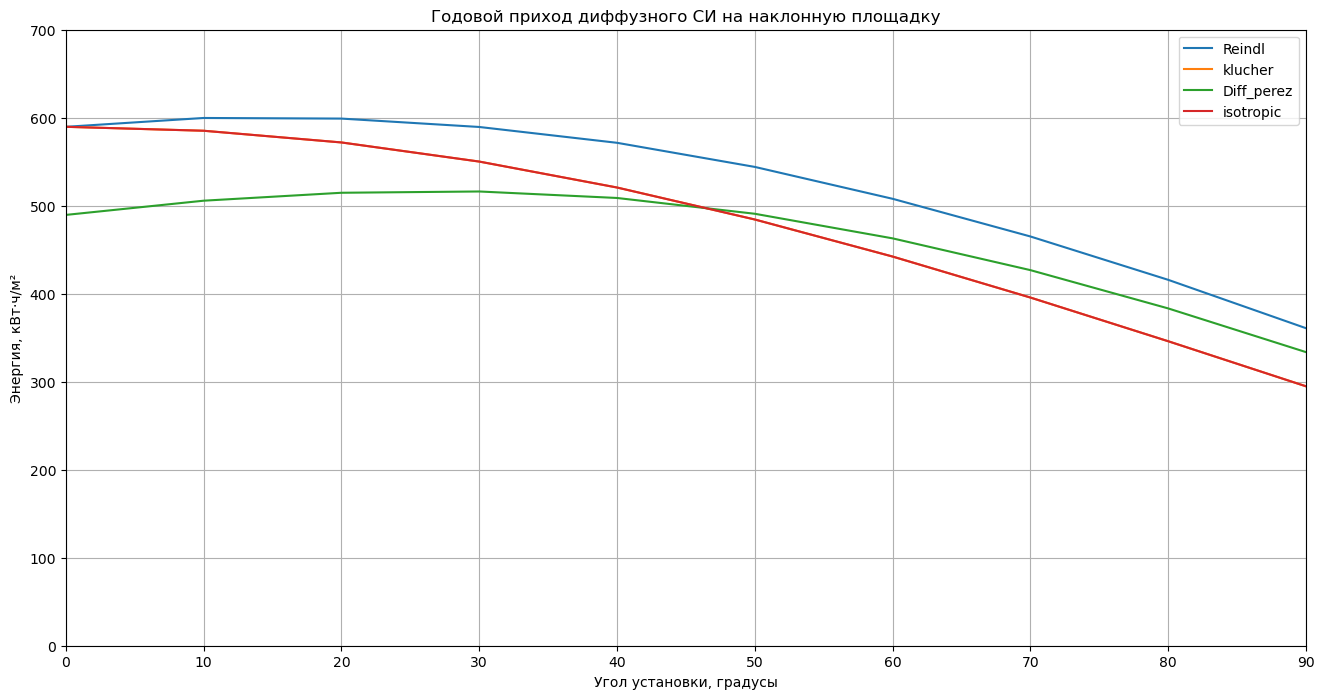

In [38]:
Reindl_year_data['Reindl'].plot(figsize=(16, 8))
klucher_year_data['klucher'].plot()
Perez_YearData['Diff_perez'].plot()
isotropic_year_data['isotropic'].plot()

plt.grid()
plt.ylabel('Энергия, кВт·ч/м²')  # Исправлены символы
plt.xlabel('Угол установки, градусы')  # Уточнены единицы измерения
plt.legend()  # Добавлена явная подпись

# Устанавливаем шаг оси X (10 градусов) и пределы
plt.xticks(range(0, 91, 10))  # Деления от 0 до 90 с шагом 10
plt.xlim(0, 90)  # Ограничение диапазона углов

plt.yticks(range(0, 701, 100))  # Деления от 0 до 90 с шагом 10
plt.ylim(0, 700)  # Ограничение диапазона углов

plt.title('Годовой приход диффузного СИ на наклонную площадку')
plt.show()

## Отраженная диффузная СИ (Perez, Klucher, Reindl):

### Perez:

In [39]:
DiffGround_Perez = [0.0] * Tilt_range

for i in range (Tilt_range):
    DiffGround_Perez[i] = pvlib.irradiance.get_ground_diffuse(surface_tilt = Tilts[i],
                                                                 ghi = PVGIS_data['ghi'],
                                                                 albedo = PVGIS_data['Albedo'],
                                                                 surface_type = None)

Perez_DiffGroundData = create_df(Tilts, DiffGround_Perez, PVGIS_data.index)

Ground_diff_YearSum = [0] * Tilt_range
for i in range(Tilt_range):
    Ground_diff_YearSum[i] = sum(Perez_DiffGroundData[str(Tilts[i])]) / 1000


Perez_YearData['Ground_Diffuse'] = Ground_diff_YearSum

### Klucher:

In [40]:
DiffuseGround_klucher = [0.0] * Tilt_range

for i in range (Tilt_range):
    DiffuseGround_klucher[i] = pvlib.irradiance.get_ground_diffuse(surface_tilt = Tilts[i],
                                                                 ghi = PVGIS_data['ghi'],
                                                                 albedo = PVGIS_data['Albedo'],
                                                                 surface_type = None)

klucher_diffuse_ground_data = create_df(Tilts, DiffuseGround_klucher, PVGIS_data.index)

Ground_diff_year_sum_klucher = [0] * Tilt_range
for i in range(Tilt_range):
    Ground_diff_year_sum_klucher[i] = sum(klucher_diffuse_ground_data[str(Tilts[i])]) / 1000


klucher_year_data['GroundDiffuse'] = Ground_diff_year_sum_klucher

### Reindl:

In [41]:
DiffuseGround_Reindl = [0.0] * Tilt_range

for i in range (Tilt_range):
    DiffuseGround_Reindl[i] = pvlib.irradiance.get_ground_diffuse(surface_tilt = Tilts[i],
                                                                 ghi = PVGIS_data['ghi'],
                                                                 albedo = PVGIS_data['Albedo'],
                                                                 surface_type = None)

Reindl_diffuse_ground_data = create_df(Tilts, DiffuseGround_Reindl, PVGIS_data.index)

Ground_diff_year_sum_Reindl = [0] * Tilt_range
for i in range(Tilt_range):
    Ground_diff_year_sum_Reindl [i] = sum(Reindl_diffuse_ground_data[str(Tilts[i])]) / 1000


Reindl_year_data['GroundDiffuse'] = Ground_diff_year_sum_Reindl

### Графическое отображение суммарной диффузной СИ:

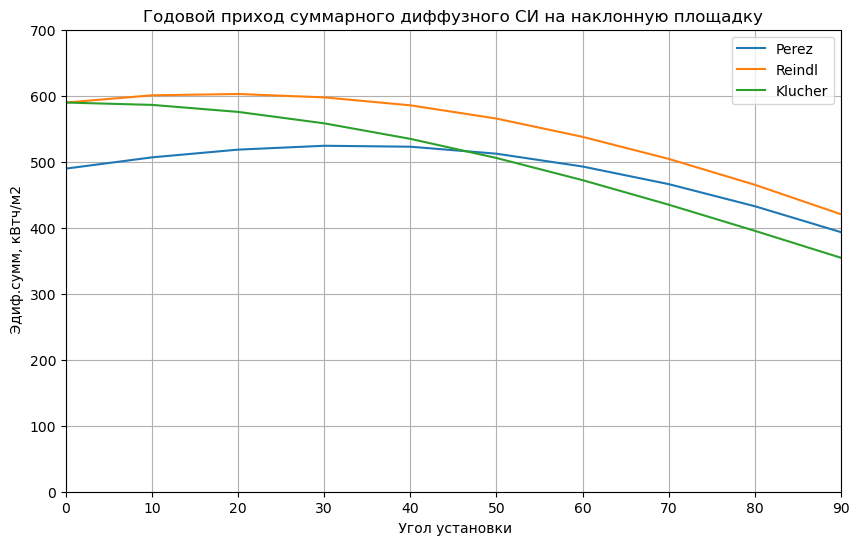

In [42]:
Perez_YearData['TotalDiff'] = Perez_YearData['Diff_perez'] + Perez_YearData['Ground_Diffuse']
Reindl_year_data['TotalDiffuse'] = Reindl_year_data['Reindl'] + Reindl_year_data['GroundDiffuse']
klucher_year_data['TotalDiffuse'] = klucher_year_data['klucher'] + klucher_year_data['GroundDiffuse']

Perez_YearData['TotalDiff'].plot(figsize = (10,6), label = 'Perez')
Reindl_year_data['TotalDiffuse'].plot(label = 'Reindl')
klucher_year_data['TotalDiffuse'].plot(label = 'Klucher')

plt.grid()
plt.ylabel(' Эдиф.сумм, кВтч/м2')
plt.xlabel(' Угол установки')
plt.legend()

plt.xticks(range(0, 91, 10))  # Деления от 0 до 90 с шагом 10
plt.xlim(0, 90)  # Ограничение диапазона углов

plt.yticks(range(0, 701, 100))
plt.ylim(0, 700)

plt.title('Годовой приход суммарного диффузного СИ на наклонную площадку')
plt.show()

## Угол падения лучей на приемную поверхность AOI:

In [43]:
AOI = [0] * Tilt_range

for i in range (Tilt_range):
    AOI[i] = pvlib.irradiance.aoi(surface_tilt = Tilts[i],
                                  surface_azimuth = surface_azimuth,
                                  solar_zenith = SPA['zenith'],
                                  solar_azimuth = SPA['azimuth'])

AOI_data = create_df(Tilts, AOI, PVGIS_data.index)

Угол установки, гр.:  0 Прирост относительно горизонтальной ПП, %:  0.0
Угол установки, гр.:  10 Прирост относительно горизонтальной ПП, %:  6.1
Угол установки, гр.:  20 Прирост относительно горизонтальной ПП, %:  9.7
Угол установки, гр.:  30 Прирост относительно горизонтальной ПП, %:  11.4
Угол установки, гр.:  40 Прирост относительно горизонтальной ПП, %:  11.2
Угол установки, гр.:  50 Прирост относительно горизонтальной ПП, %:  8.8
Угол установки, гр.:  60 Прирост относительно горизонтальной ПП, %:  3.8
Угол установки, гр.:  70 Прирост относительно горизонтальной ПП, %:  -3.9
Угол установки, гр.:  80 Прирост относительно горизонтальной ПП, %:  -15.6
Угол установки, гр.:  90 Прирост относительно горизонтальной ПП, %:  -33.3


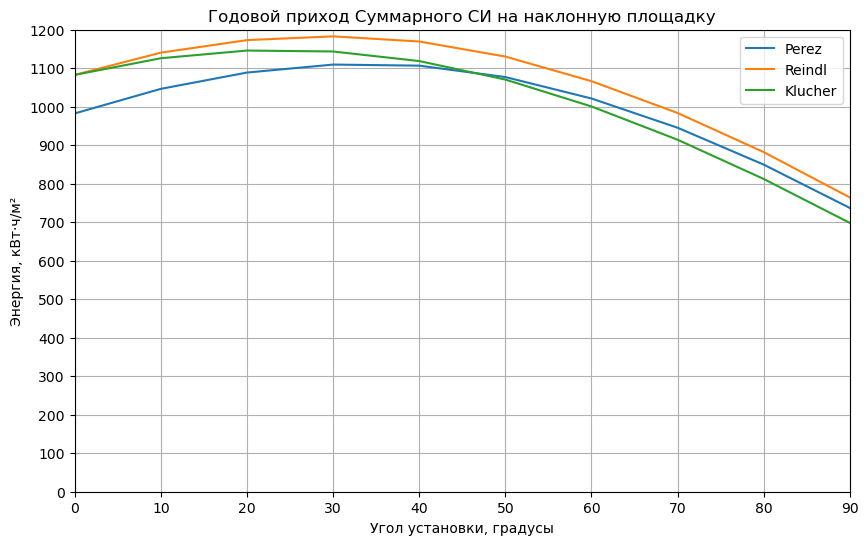

In [44]:
#PEREZ
GI_aoi = [0] * Tilt_range
GI_year_Perez = [0] * Tilt_range
pd_transf = {}

for i in range(Tilt_range):
    GI_aoi[i] = pvlib.irradiance.poa_components(aoi = AOI_data[str(Tilts[i])],
                                                 dni = PVGIS_data['dni'],
                                                 poa_sky_diffuse = Perez_DiffData[str(Tilts[i])],
                                                 poa_ground_diffuse = Perez_DiffGroundData[str(Tilts[i])])


for i in range(Tilt_range):
    pd_transf[str(Tilts[i])] = GI_aoi[i]['poa_global']
    
GI_aoi_data = pd.DataFrame(pd_transf, index = PVGIS_data.index)


for i in range(Tilt_range):
    GI_year_Perez[i] = sum(GI_aoi_data[str(Tilts[i])]) / 1000
    print('Угол установки, гр.: ', Tilts[i], 'Прирост относительно горизонтальной ПП, %: ', 
          (round(((GI_year_Perez[i] - GI_year_Perez[0]) / GI_year_Perez[i] * 100), 1)))

#REINDL
GI_aoi = [0] * Tilt_range
GI_year_Reindl = [0] * Tilt_range
pd_transf = {}

for i in range(Tilt_range):
    GI_aoi[i] = pvlib.irradiance.poa_components(aoi = AOI_data[str(Tilts[i])],
                                                 dni = PVGIS_data['dni'],
                                                 poa_sky_diffuse = Reindl_diffuse_sky_data[str(Tilts[i])],
                                                 poa_ground_diffuse = Reindl_diffuse_ground_data[str(Tilts[i])])


for i in range(Tilt_range):
    pd_transf[str(Tilts[i])] = GI_aoi[i]['poa_global']
    
GI_aoi_data = pd.DataFrame(pd_transf, index = PVGIS_data.index)


for i in range(Tilt_range):
    GI_year_Reindl[i] = sum(GI_aoi_data[str(Tilts[i])]) / 1000
    
#KLUCHER
GI_aoi = [0] * Tilt_range
GI_year_klucher = [0] * Tilt_range
pd_transf = {}

for i in range(Tilt_range):
    GI_aoi[i] = pvlib.irradiance.poa_components(aoi = AOI_data[str(Tilts[i])],
                                                 dni = PVGIS_data['dni'],
                                                 poa_sky_diffuse = klucher_diffuse_sky_data[str(Tilts[i])],
                                                 poa_ground_diffuse = klucher_diffuse_ground_data[str(Tilts[i])])


for i in range(Tilt_range):
    pd_transf[str(Tilts[i])] = GI_aoi[i]['poa_global']
    
GI_aoi_data = pd.DataFrame(pd_transf, index = PVGIS_data.index)


for i in range(Tilt_range):
    GI_year_klucher[i] = sum(GI_aoi_data[str(Tilts[i])]) / 1000



Perez_YearData['GlobalIrradiation'] = GI_year_Perez
Perez_YearData['GlobalIrradiation'].plot(figsize = (10,6), label = 'Perez')

Reindl_year_data['GlobalIrradiation'] = GI_year_Reindl
Reindl_year_data['GlobalIrradiation'].plot(label = 'Reindl')

klucher_year_data['GlobalIrradiation'] = GI_year_klucher
klucher_year_data['GlobalIrradiation'].plot( label = 'Klucher')
plt.grid()
plt.ylabel('Энергия, кВт·ч/м²')  # Исправлены символы
plt.xlabel('Угол установки, градусы')  # Уточнены единицы измерения
plt.legend()  # Добавлена явная подпись

# Устанавливаем шаг оси X (10 градусов) и пределы
plt.xticks(range(0, 91, 10))  # Деления от 0 до 90 с шагом 10
plt.xlim(0, 90)  # Ограничение диапазона углов

plt.yticks(range(0, 1201, 100))
plt.ylim(0, 1200)

plt.title('Годовой приход Cуммарного СИ на наклонную площадку')
plt.show()

In [45]:
tilt_array = [0, 10, 20, 30, 40, 50, 60, 70, 80, 90]

pd_models = {'Perez': Perez_YearData['GlobalIrradiation'], 
            'Reindl': Reindl_year_data['GlobalIrradiation'], 
            'Klucher': klucher_year_data['GlobalIrradiation']}

pd_tilt_models = pd.DataFrame(pd_models, index = tilt_array)
print(pd_tilt_models)

          Perez       Reindl      Klucher
0    982.615763  1082.722289  1082.722289
10  1046.471245  1140.473813  1125.951078
20  1088.756604  1173.039147  1145.920165
30  1109.477370  1182.780076  1143.465354
40  1106.705800  1169.408741  1118.598667
50  1077.019893  1130.258227  1070.514408
60  1021.398850  1066.363501  1000.735239
70   945.433258   983.680379   914.286002
80   849.660378   882.152167   812.374433
90   737.140892   764.324657   698.306395


### Для Анапы (юг России, умеренно-континентальный климат с влиянием Черного моря) выбор модели зависит от типичных погодных условий. Perez - лучший выбор для Анапы, так как:
#### - точно учитывает яркие околосолнечные области (актуально для ясного неба);
#### - корректно моделирует морское влияние (повышенная диффузия из-за влажности и аэрозолей);
#### - подтверждена исследованиями для средиземноморского и субтропического климата (аналоги Анапы).

## Оптимальный угол установки равен 30 градусам.

## Сравнение модели Perez с моделью Клейна (при угле 30 градусах):

## Данные модели Klein:

In [46]:
MonthSum_Klein_ghi = [66.96, 85.82, 125.09, 
                          147.5, 176.55, 184.73, 
                          198.44, 189.29, 160.1, 
                          123.67, 80.6, 59.66] 
MonthSum_Klein_ghi

[66.96,
 85.82,
 125.09,
 147.5,
 176.55,
 184.73,
 198.44,
 189.29,
 160.1,
 123.67,
 80.6,
 59.66]

## Месячный приход суммарной СИ по моделе Perez при угле установке ПП равном 30 градусов.

           GHI_Perez  DHI_Perez
Январь     52.000623  22.365539
Февраль    58.317249  35.515281
Март       85.702803  47.573545
Апрель    108.266332  55.467612
Май       134.116601  63.897889
Июнь      143.009263  58.802303
Июль      148.600675  59.371436
Август    139.101470  51.196784
Сентябрь  111.434555  45.238736
Октябрь    85.372062  42.189999
Ноябрь     43.415893  24.582115
Декабрь    34.127830  17.971558


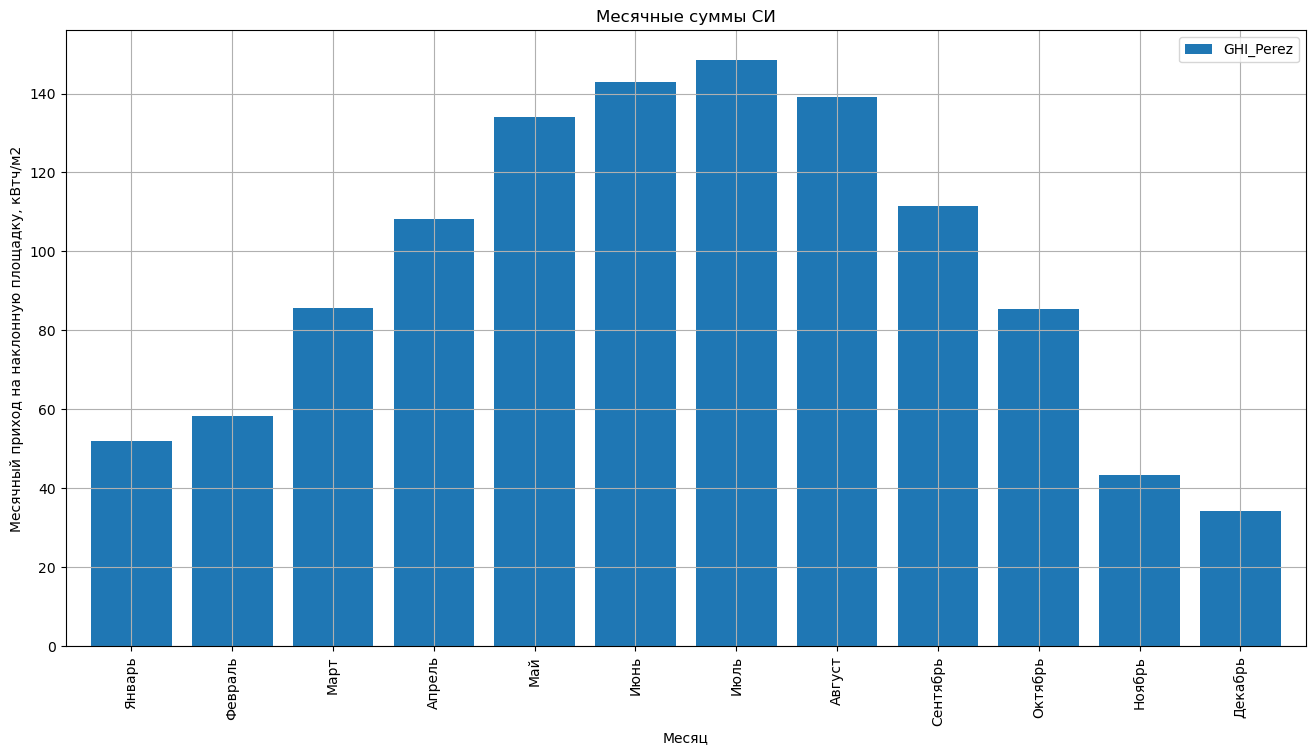

In [47]:
DHI_month_sum_Perez = [0.0] * 12
GHI_month_sum_Perez = [0.0] * 12

months_array = ['Январь','Февраль','Март','Апрель','Май','Июнь','Июль','Август','Сентябрь','Октябрь','Ноябрь','Декабрь']

GHI_Perez = GI_aoi_data[str(Tilts[3])]
DHI_Perez = (DiffGround_Perez[3] + Diff_Perez[3]).fillna(0)

for i in range (lendata):
    month = int(PVGIS_data.index[i].to_pydatetime().strftime('%m'))
    DHI_month_sum_Perez[month - 1] += float(DHI_Perez.iloc[i] / 1000)
    GHI_month_sum_Perez[month - 1] += float(GHI_Perez.iloc[i] / 1000)


pd_transf = {'GHI_Perez': GHI_month_sum_Perez, 
             'DHI_Perez': DHI_month_sum_Perez}

pd_month_Perez = pd.DataFrame(pd_transf, index = months_array)
print(pd_month_Perez)

pd_month_Perez.iloc[0 : len(pd_month_Perez), [0]].plot(kind = 'bar', figsize = (16,8), width = 0.8)
plt.xlabel('Месяц')
plt.ylabel('Месячный приход на наклонную площадку, кВтч/м2') 
plt.grid()
plt.title('Месячные суммы СИ')
plt.show()

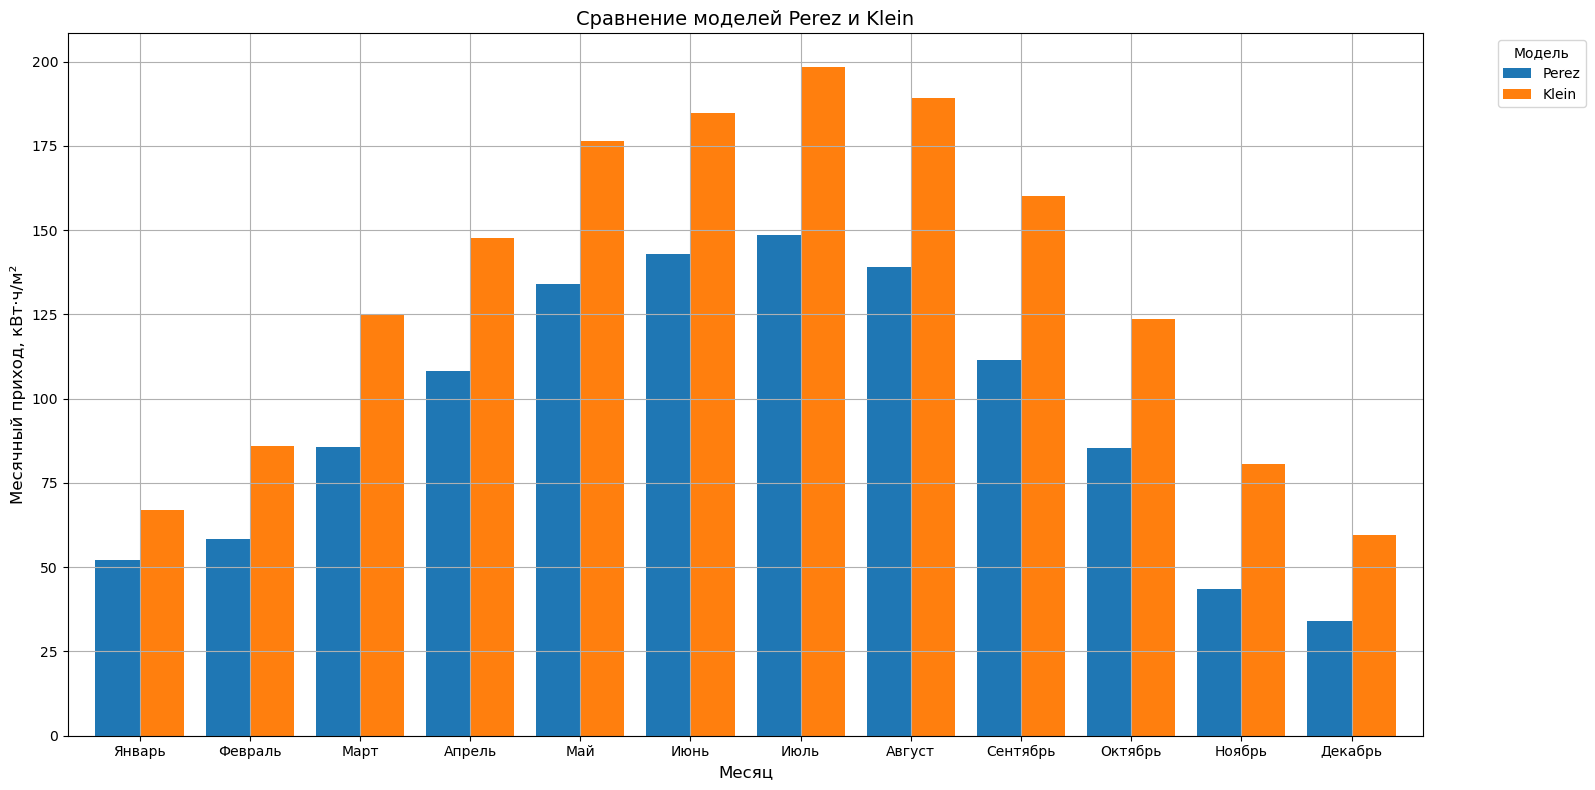

In [48]:
pd_month_GHI['Klein'] = MonthSum_Klein_ghi

# Объединяем данные в один DataFrame
df_combined = pd.DataFrame({'Perez': pd_month_Perez.iloc[:, 0],
    'Klein': pd_month_GHI['Klein']})

# Создаем группированный bar plot
ax = df_combined.plot(kind='bar',
    figsize=(16, 8),
    width=0.8,
    color=['#1f77b4', '#ff7f0e'])

# Настройки графика
plt.xlabel('Месяц', fontsize=12)
plt.ylabel('Месячный приход, кВт·ч/м²', fontsize=12)
plt.title('Сравнение моделей Perez и Klein', fontsize=14)
plt.grid()
plt.xticks(rotation=0)  # Горизонтальные подписи месяцев

# Добавляем легенду и настраиваем её расположение
plt.legend(title='Модель',
    bbox_to_anchor=(1.05, 1),  # Правее графика
    loc='upper left')

plt.tight_layout()  # Автоматическая подгонка layout
plt.show()

## Данные о моделях ФЭМ:

In [49]:
PV_Modules_source = pvlib.pvsystem.retrieve_sam(name = None, path = 'CEC_Modules.csv')
PV_Modules = PV_Modules_source.transpose()
PV_Modules = PV_Modules.rename_axis('Name').reset_index()
PV_Modules

C:\Anaconda\Lib\site-packages\pvlib\pvsystem.py:2132: UserWarning: Original names contain 505 duplicate(s).
  warnings.warn('Original names contain %d duplicate(s).' % n_duplicates)
C:\Anaconda\Lib\site-packages\pvlib\pvsystem.py:2136: UserWarning: Normalized names contain 505 duplicate(s).
  warnings.warn(


,Name,Manufacturer,Technology,Bifacial,STC,PTC,A_c,Length,Width,N_s,...,a_ref,I_L_ref,I_o_ref,R_s,R_sh_ref,Adjust,gamma_pmp,BIPV,Version,Date
0,Ablytek_6MN6A270,Ablytek,Mono-c-Si,0,270.643,242.1,1.627,1.64,0.992,60,...,1.58733,9.34243,0.0,0.374013,1440.5,12.6561,-0.4509,N,2023.12.17,11/14/2024
1,Ablytek_6MN6A275,Ablytek,Mono-c-Si,0,275.191,246.7,1.627,1.64,0.992,60,...,1.60182,9.42313,0.0,0.374165,1127.45,12.7242,-0.4509,N,2023.12.17,11/14/2024
2,Ablytek_6MN6A280,Ablytek,Mono-c-Si,0,280.09,251.3,1.627,1.64,0.992,60,...,1.61626,9.51376,0.0,0.37392,945.874,12.784,-0.4509,N,2023.12.17,11/14/2024
3,Ablytek_6MN6A285,Ablytek,Mono-c-Si,0,285.031,256.0,1.627,1.64,0.992,60,...,1.62978,9.59321,0.0,0.374045,1116.6,12.7245,-0.4509,N,2023.12.17,11/14/2024
4,Ablytek_6MN6A290,Ablytek,Mono-c-Si,0,290.016,260.6,1.627,1.64,0.992,60,...,1.64329,9.67267,0.0,0.374168,1357.41,12.666,-0.4509,N,2023.12.17,11/14/2024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20738,Zytech_Solar_ZT300P,Zytech Solar,Multi-c-Si,0,300.003,271.2,1.931,1.95,0.99,72,...,1.84441,8.80531,0.0,0.515735,552.453,5.41556,-0.4308,N,2023.12.17,11/14/2024
20739,Zytech_Solar_ZT305P,Zytech Solar,Multi-c-Si,0,305.056,275.8,1.931,1.95,0.99,72,...,1.84915,8.87402,0.0,0.506612,1119.08,5.24155,-0.4308,N,2023.12.17,11/14/2024
20740,Zytech_Solar_ZT310P,Zytech Solar,Multi-c-Si,0,310.144,280.5,1.931,1.95,0.99,72,...,1.8574,8.9948,0.0,0.495904,767.951,5.44635,-0.4308,N,2023.12.17,11/14/2024
20741,Zytech_Solar_ZT315P,Zytech Solar,Multi-c-Si,0,315.094,285.1,1.931,1.95,0.99,72,...,1.86503,9.10661,0.0,0.488376,682.29,5.57875,-0.4308,N,2023.12.17,11/14/2024


## Добавление столбца эффективности в таблицу с модулями:

In [50]:
eff_modules = [0.0] * len(PV_Modules)

for i in range(len(eff_modules)):
    eff_modules[i] = PV_Modules['STC'].loc[i] / (PV_Modules['A_c'].loc[i] * 1000)

PV_Modules['eff'] = eff_modules
PV_Modules

,Name,Manufacturer,Technology,Bifacial,STC,PTC,A_c,Length,Width,N_s,...,I_L_ref,I_o_ref,R_s,R_sh_ref,Adjust,gamma_pmp,BIPV,Version,Date,eff
0,Ablytek_6MN6A270,Ablytek,Mono-c-Si,0,270.643,242.1,1.627,1.64,0.992,60,...,9.34243,0.0,0.374013,1440.5,12.6561,-0.4509,N,2023.12.17,11/14/2024,0.166345
1,Ablytek_6MN6A275,Ablytek,Mono-c-Si,0,275.191,246.7,1.627,1.64,0.992,60,...,9.42313,0.0,0.374165,1127.45,12.7242,-0.4509,N,2023.12.17,11/14/2024,0.169140
2,Ablytek_6MN6A280,Ablytek,Mono-c-Si,0,280.09,251.3,1.627,1.64,0.992,60,...,9.51376,0.0,0.37392,945.874,12.784,-0.4509,N,2023.12.17,11/14/2024,0.172151
3,Ablytek_6MN6A285,Ablytek,Mono-c-Si,0,285.031,256.0,1.627,1.64,0.992,60,...,9.59321,0.0,0.374045,1116.6,12.7245,-0.4509,N,2023.12.17,11/14/2024,0.175188
4,Ablytek_6MN6A290,Ablytek,Mono-c-Si,0,290.016,260.6,1.627,1.64,0.992,60,...,9.67267,0.0,0.374168,1357.41,12.666,-0.4509,N,2023.12.17,11/14/2024,0.178252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20738,Zytech_Solar_ZT300P,Zytech Solar,Multi-c-Si,0,300.003,271.2,1.931,1.95,0.99,72,...,8.80531,0.0,0.515735,552.453,5.41556,-0.4308,N,2023.12.17,11/14/2024,0.155361
20739,Zytech_Solar_ZT305P,Zytech Solar,Multi-c-Si,0,305.056,275.8,1.931,1.95,0.99,72,...,8.87402,0.0,0.506612,1119.08,5.24155,-0.4308,N,2023.12.17,11/14/2024,0.157978
20740,Zytech_Solar_ZT310P,Zytech Solar,Multi-c-Si,0,310.144,280.5,1.931,1.95,0.99,72,...,8.9948,0.0,0.495904,767.951,5.44635,-0.4308,N,2023.12.17,11/14/2024,0.160613
20741,Zytech_Solar_ZT315P,Zytech Solar,Multi-c-Si,0,315.094,285.1,1.931,1.95,0.99,72,...,9.10661,0.0,0.488376,682.29,5.57875,-0.4308,N,2023.12.17,11/14/2024,0.163177


## Отбор подходящих солнечных модулей:

#### В климатических условиях Анапы: оптимальный выбор – Mono-c-Si (если бюджет позволяет) или CdTe (если важна экономия). 
#### Будем выбирать модули монокристаллического кремния. Варианты мощности ФЭМ в диапазоне (300 - 550). Рассматривались китайские производители, которые точно находятся на рынке и их продукции можно приобрести.

In [51]:
PV_Modules_chosen1 = pd.DataFrame(columns = PV_Modules.columns)

PV_P_min_1 = 399
PV_type_1 = 'Mono-c-Si'
PV_bifacial_1 = 0
Square_max_1 = 2
eff_min_1 = 0.16
Manufacturer1 = 'Jinko Solar Co. Ltd'

ind = 0
for i in range(len(PV_Modules)):
    if PV_Modules['STC'].iloc[i] >= PV_P_min_1: # по мощности
        if PV_Modules['Technology'].iloc[i] == PV_type_1: # по типу СЭ, может быть:
                                                                 # CdTe
                                                                 # CIGS
                                                                 # Mono-c-Si
                                                                 # Multi-c-Si
                                                                 # Thin Film
            if PV_Modules['Bifacial'].iloc[i] == PV_bifacial_1: # односторонний (0) или двусторонний (1)
                if PV_Modules['A_c'].iloc[i] < Square_max_1: # по площади
                    if PV_Modules['eff'].iloc[i] > eff_min_1: # по КПД
                        if PV_Modules['Manufacturer'].iloc[i] == Manufacturer1:
                            PV_Modules_chosen1.loc[ind] = PV_Modules.iloc[i]
                            ind += 1

PV_Modules_chosen2 = pd.DataFrame(columns = PV_Modules.columns)

PV_P_min_2 = 350
PV_type_2 = 'Mono-c-Si'
PV_bifacial_2 = 0
Square_max_2 = 2
eff_min_2 = 0.16
Manufacturer2 = 'Trina Solar'

ind = 0
for i in range(len(PV_Modules)):
    if PV_Modules['STC'].iloc[i] >= PV_P_min_2: # по мощности
        if PV_Modules['Technology'].iloc[i] == PV_type_2: # по типу СЭ, может быть:
                                                                 # CdTe
                                                                 # CIGS
                                                                 # Mono-c-Si
                                                                 # Multi-c-Si
                                                                 # Thin Film
            if PV_Modules['Bifacial'].iloc[i] == PV_bifacial_2: # односторонний (0) или двусторонний (1)
                if PV_Modules['A_c'].iloc[i] < Square_max_2: # по площади
                    if PV_Modules['eff'].iloc[i] > eff_min_2: # по КПД
                        if PV_Modules['Manufacturer'].iloc[i] == Manufacturer2:
                            PV_Modules_chosen2.loc[ind] = PV_Modules.iloc[i]
                            ind += 1

PV_Modules_chosen3 = pd.DataFrame(columns = PV_Modules.columns)

PV_P_min_3 = 300
PV_type_3 = 'Mono-c-Si'
PV_bifacial_3 = 0
Square_max_3 = 2
eff_min_3 = 0.16
Manufacturer3 = 'LONGi Green Energy Technology Co. Ltd.'

ind = 0
for i in range(len(PV_Modules)):
    if PV_Modules['STC'].iloc[i] >= PV_P_min_3: # по мощности
        if PV_Modules['Technology'].iloc[i] == PV_type_3: # по типу СЭ, может быть:
                                                                 # CdTe
                                                                 # CIGS
                                                                 # Mono-c-Si
                                                                 # Multi-c-Si
                                                                 # Thin Film
            if PV_Modules['Bifacial'].iloc[i] == PV_bifacial_3: # односторонний (0) или двусторонний (1)
                if PV_Modules['A_c'].iloc[i] < Square_max_3: # по площади
                    if PV_Modules['eff'].iloc[i] > eff_min_3: # по КПД
                        if PV_Modules['Manufacturer'].iloc[i] == Manufacturer3:
                            PV_Modules_chosen3.loc[ind] = PV_Modules.iloc[i]
                            ind += 1

PV_Modules_chosen4 = pd.DataFrame(columns = PV_Modules.columns)

PV_P_min_4 = 550
PV_type_4 = 'Mono-c-Si'
PV_bifacial_4 = 0
Square_max_4 = 3
eff_min_4 = 0.16
Manufacturer4 = 'Suzhou Talesun Solar Technologies Co. Ltd.'

ind = 0
for i in range(len(PV_Modules)):
    if PV_Modules['STC'].iloc[i] >= PV_P_min_4: # по мощности
        if PV_Modules['Technology'].iloc[i] == PV_type_4: # по типу СЭ, может быть:
                                                                 # CdTe
                                                                 # CIGS
                                                                 # Mono-c-Si
                                                                 # Multi-c-Si
                                                                 # Thin Film
            if PV_Modules['Bifacial'].iloc[i] == PV_bifacial_4: # односторонний (0) или двусторонний (1)
                if PV_Modules['A_c'].iloc[i] < Square_max_4: # по площади
                    if PV_Modules['eff'].iloc[i] > eff_min_4: # по КПД
                        if PV_Modules['Manufacturer'].iloc[i] == Manufacturer4:
                            PV_Modules_chosen4.loc[ind] = PV_Modules.iloc[i]
                            ind += 1

C:\Users\Ярослав\AppData\Local\Temp\ipykernel_9920\4206839454.py:48: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  PV_Modules_chosen2.loc[ind] = PV_Modules.iloc[i]
C:\Users\Ярослав\AppData\Local\Temp\ipykernel_9920\4206839454.py:73: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  PV_Modules_chosen3.loc[ind] = PV_Modules.iloc[i]


## Таблица характеристик отобранных модулей:

#### Данные по размерам модулей отсутствовали в таблице с моделями ФЭМ, поэтому их пришлось добавть вручную. Также в блоке реализована проверка на наличие данных.

In [52]:
PV_modules_candidates = pd.DataFrame(columns = PV_Modules.columns)

try:
    PV_modules_candidates.loc[0] = PV_Modules_chosen1.iloc[0]
    PV_modules_candidates.loc[0, 'Length'] = 1.979   # Пример: длина = 2.0 м
    PV_modules_candidates.loc[0, 'Width'] = 1.002    # Пример: ширина = 1.0 м
except IndexError:
    print("Ошибка: PV_Modules_chosen1 пуст.")
#------------------------------------------------------------    
try:
    PV_modules_candidates.loc[1] = PV_Modules_chosen2.iloc[0]
    PV_modules_candidates.loc[1, 'Length'] = 1.96
    PV_modules_candidates.loc[1, 'Width'] = 0.947
except IndexError:
    print("Ошибка: PV_Modules_chosen2 пуст.")
#------------------------------------------------------------     
try:
    PV_modules_candidates.loc[2] = PV_Modules_chosen3.iloc[0]
    PV_modules_candidates.loc[2, 'Length'] = 1.65
    PV_modules_candidates.loc[2, 'Width'] = 0.991
except IndexError:
    print("Ошибка: PV_Modules_chosen3 пуст.")
#------------------------------------------------------------     
try:
    PV_modules_candidates.loc[3] = PV_Modules_chosen4.iloc[0]
    PV_modules_candidates.loc[3, 'Length'] = 2.278
    PV_modules_candidates.loc[3, 'Width'] = 1.134
    
except IndexError:
    print("Ошибка: PV_Modules_chosen4 пуст.")
#------------------------------------------------------------    
Candidates_len = len(PV_modules_candidates)

PV_modules_candidates

,Name,Manufacturer,Technology,Bifacial,STC,PTC,A_c,Length,Width,N_s,...,I_L_ref,I_o_ref,R_s,R_sh_ref,Adjust,gamma_pmp,BIPV,Version,Date,eff
0,Jinko_Solar_Co__Ltd_JKM400M_72BL,Jinko Solar Co. Ltd,Mono-c-Si,0,400.32,369.6,1.92,1.979,1.002,72,...,10.3753,0.0,0.208976,141.487,7.7493,-0.391,N,2023.12.17,11/14/2024,0.2085
1,Trina_Solar_TSM_350DE14H_II_,Trina Solar,Mono-c-Si,0,350.592,326.0,1.96,1.96,0.947,48,...,9.60213,0.0,0.304643,1373.98,5.22702,-0.353,N,2023.12.17,11/14/2024,0.178873
2,LONGi_Green_Energy_Technology_Co__Ltd__LR6_60H...,LONGi Green Energy Technology Co. Ltd.,Mono-c-Si,0,300.377,278.9,1.62,1.65,0.991,60,...,9.71087,0.0,0.261143,233.082,3.32477,-0.335,N,2023.12.17,11/14/2024,0.185418
3,Suzhou_Talesun_Solar_Technologies_Co__Ltd__TP7...,Suzhou Talesun Solar Technologies Co. Ltd.,Mono-c-Si,0,550.62,513.2,2.59,2.278,1.134,72,...,14.0138,0.0,0.149307,151.843,10.2236,-0.358,N,2023.12.17,11/14/2024,0.212595


## Вывод параметров модулей:

In [53]:
for i in range(Candidates_len):
    print('Название: ',PV_modules_candidates['Name'].loc[i])
    print('Пиковая мощность: ',PV_modules_candidates['STC'].loc[i])
    print('Длина: ',PV_modules_candidates['Length'].loc[i] * 1000, 'x Ширина: ',PV_modules_candidates['Width'].loc[i] * 1000)
    print('Ток КЗ: ',PV_modules_candidates['I_sc_ref'].loc[i])
    print('Напряжение ХХ: ',PV_modules_candidates['V_oc_ref'].loc[i])
    print('Ток ТММ: ',PV_modules_candidates['I_mp_ref'].loc[i])
    print('Напряжение ТММ: ',PV_modules_candidates['V_mp_ref'].loc[i])
    print('Температурный коэф. КЗ: ',PV_modules_candidates['alpha_sc'].loc[i])
    print('Температурный коэф. ХХ: ',PV_modules_candidates['beta_oc'].loc[i])
    print('Температурный коэф мощности: ',PV_modules_candidates['gamma_pmp'].loc[i])
    print('Тип ФЭМ: ',PV_modules_candidates['Technology'].loc[i])
    print('Эффективность ФЭМ: ',round(PV_modules_candidates['eff'].loc[i],4))
    print('')

Название:  Jinko_Solar_Co__Ltd_JKM400M_72BL
Пиковая мощность:  400.32
Длина:  1979.0 x Ширина:  1002.0
Ток КЗ:  10.36
Напряжение ХХ:  49.8
Ток ТММ:  9.6
Напряжение ТММ:  41.7
Температурный коэф. КЗ:  0.004662
Температурный коэф. ХХ:  -0.153882
Температурный коэф мощности:  -0.391
Тип ФЭМ:  Mono-c-Si
Эффективность ФЭМ:  0.2085

Название:  Trina_Solar_TSM_350DE14H_II_
Пиковая мощность:  350.592
Длина:  1960.0 x Ширина:  947.0
Ток КЗ:  9.6
Напряжение ХХ:  46.5
Ток ТММ:  9.13
Напряжение ТММ:  38.4
Температурный коэф. КЗ:  0.00432
Температурный коэф. ХХ:  -0.12741
Температурный коэф мощности:  -0.353
Тип ФЭМ:  Mono-c-Si
Эффективность ФЭМ:  0.1789

Название:  LONGi_Green_Energy_Technology_Co__Ltd__LR6_60HIB_300M
Пиковая мощность:  300.377
Длина:  1650.0 x Ширина:  991.0
Ток КЗ:  9.7
Напряжение ХХ:  39.8
Ток ТММ:  9.13
Напряжение ТММ:  32.9
Температурный коэф. КЗ:  0.004268
Температурный коэф. ХХ:  -0.107062
Температурный коэф мощности:  -0.335
Тип ФЭМ:  Mono-c-Si
Эффективность ФЭМ:  0.1854



## Расчет температуры модулей:

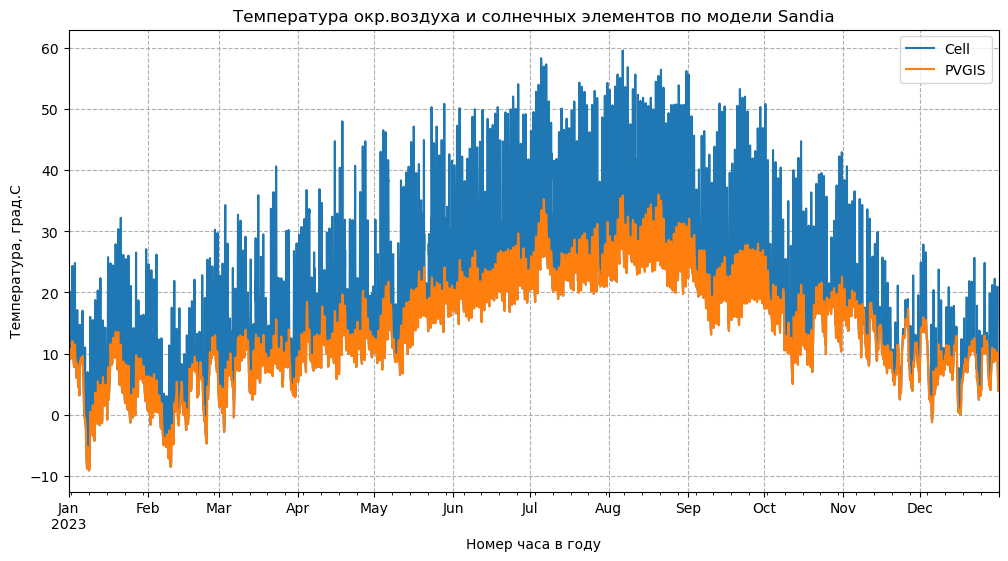

Минимальная температура модуля -9.1
Максимальная температура модуля 59.55


In [54]:
a = -3.56
b = -0.075
deltaT = 3
opt_tilt = 30

Cells_temperature_PVSIST = pvlib.temperature.sapm_cell(GI_aoi_data[str(opt_tilt)], 
                            PVGIS_data['temp_air'], 
                            PVGIS_data['wind_speed'], 
                            a, 
                            b, 
                            deltaT, 
                            irrad_ref=1000.0)

#Cells_temperature_NASA.plot(figsize=(16,8), label='NASA')
Cells_temperature_PVSIST.plot(figsize=(12,6), label='Cell')
PVGIS_data['temp_air'].plot(label='PVGIS')
plt.legend()
plt.grid(linestyle='--')
plt.ylabel('Температура, град.C')
plt.xlabel('Номер часа в году')
plt.title('Температура окр.воздуха и солнечных элементов по модели Sandia')
plt.show()

print('Минимальная температура модуля', round(Cells_temperature_PVSIST.min(), 2))
print('Максимальная температура модуля', round(Cells_temperature_PVSIST.max(), 2))

## Выработка на стороне постоянного тока:

In [55]:
DC_out = [0.0] * Candidates_len

for i in range (Candidates_len):
    Module = PV_modules_candidates.iloc[i]
    I_L, I_0, R_s, R_sh, nNsVth = pvlib.pvsystem.calcparams_desoto(effective_irradiance = GI_aoi_data[str(opt_tilt)],
                                                                   temp_cell = Cells_temperature_PVSIST,
                                                                   alpha_sc = Module['alpha_sc'],
                                                                   a_ref = Module['a_ref'],
                                                                   I_L_ref = Module['I_L_ref'],
                                                                   I_o_ref = Module['I_o_ref'],
                                                                   R_sh_ref = Module['R_sh_ref'],
                                                                   R_s = Module['R_s'],
                                                                   EgRef = 1.121,
                                                                   dEgdT = -0.0002677,
                                                                   irrad_ref = 1000,
                                                                   temp_ref = 25)
                                                                   
                                                                   
    
    DC_out[i] = pvlib.pvsystem.singlediode(photocurrent = I_L,
                               saturation_current = I_0 , 
                               resistance_series = R_s, 
                               resistance_shunt = R_sh,
                               nNsVth = nNsVth,
                               method = 'newton')
    
DC_out_module_1_data = DC_out[0]
DC_out_module_2_data = DC_out[1]
DC_out_module_3_data = DC_out[2]
DC_out_module_4_data = DC_out[3]

print(sum(DC_out_module_1_data['p_mp']) / 1000, 'кВт*ч')
print('')
print(sum(DC_out_module_2_data['p_mp']) / 1000, 'кВт*ч')
print('')
print(sum(DC_out_module_3_data['p_mp']) / 1000, 'кВт*ч')
print('')
print(sum(DC_out_module_4_data['p_mp']) / 1000, 'кВт*ч')

437.40423158538476 кВт*ч

389.22291551163 кВт*ч

334.26492100724033 кВт*ч

603.5578599094536 кВт*ч


## Данные по инверторному оборудованию:

In [56]:
PV_Inverters_source = pvlib.pvsystem.retrieve_sam(name=None, path='CEC_Inverters.csv')
PV_Inverters = PV_Inverters_source.transpose()
PV_Inverters = PV_Inverters.rename_axis('Name').reset_index()
PV_Inverters

,Name,Vac,Pso,Paco,Pdco,Vdco,C0,C1,C2,C3,Pnt,Vdcmax,Idcmax,Mppt_low,Mppt_high,CEC_Date,CEC_hybrid
0,ABB__PVI_3_0_OUTD_S_US_A__208V_,208,18.1674,3000.0,3142.3,310.0,-0.000008,-0.000011,0.000999,-0.000287,0.1,480.0,10.1365,100.0,480.0,10/15/2018,N
1,ABB__PVI_3_0_OUTD_S_US_A__240V_,240,16.8813,3000.0,3121.67,340.0,-0.000006,-0.000021,0.000583,-0.000712,0.1,480.0,9.18138,100.0,480.0,10/15/2018,N
2,ABB__PVI_3_0_OUTD_S_US_A__277V_,277,22.0466,3000.0,3106.85,390.0,-0.000005,-0.000033,-0.000032,-0.00118,0.2,480.0,7.96628,100.0,480.0,10/15/2018,N
3,ABB__PVI_3_0_OUTD_S_US_Z_A__208V_,208,18.1674,3000.0,3142.3,310.0,-0.000008,-0.000011,0.000999,-0.000287,0.1,480.0,10.1365,100.0,480.0,10/15/2018,N
4,ABB__PVI_3_0_OUTD_S_US_Z_A__240V_,240,16.8813,3000.0,3121.67,340.0,-0.000006,-0.000021,0.000583,-0.000712,0.1,480.0,9.18138,100.0,480.0,10/15/2018,N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2079,Zhejiang_Hyxi_Technology_Co___Ltd__HYX_M800_S_...,240,1.3483,723.0,753.434,42.0,-0.000015,0.000177,-0.00665,0.004603,0.4,50.0,17.9389,35.0,50.0,11/1/2024,N
2080,Zhejiang_Hyxi_Technology_Co___Ltd__HYX_M800_SW...,208,2.08855,800.39,835.094,42.0,-0.000013,-0.000413,-0.004319,-0.107438,0.23,50.0,19.8832,35.0,50.0,NaN,N
2081,Zhejiang_Hyxi_Technology_Co___Ltd__HYX_M800_SW...,240,6.4626,800.124,846.227,42.0,-0.000083,-0.001306,0.005864,-0.023282,0.23,50.0,20.1483,35.0,50.0,NaN,N
2082,Zhejiang_Hyxi_Technology_Co___Ltd__HYX_M800_SW...,208,0.975306,721.0,751.212,42.0,-0.000013,0.000275,0.098651,0.075813,0.3,50.0,17.886,35.0,50.0,11/1/2024,N


## Добавление столбца эффективности в таблицу с инверторами:

In [57]:
eff_Inverters = [0.0] * len(PV_Inverters)

for i in range(len(eff_Inverters)):
    eff_Inverters[i] = PV_Inverters['Paco'].loc[i] / (PV_Inverters['Pdco'].loc[i] )

PV_Inverters['eff'] = eff_Inverters
PV_Inverters

,Name,Vac,Pso,Paco,Pdco,Vdco,C0,C1,C2,C3,Pnt,Vdcmax,Idcmax,Mppt_low,Mppt_high,CEC_Date,CEC_hybrid,eff
0,ABB__PVI_3_0_OUTD_S_US_A__208V_,208,18.1674,3000.0,3142.3,310.0,-0.000008,-0.000011,0.000999,-0.000287,0.1,480.0,10.1365,100.0,480.0,10/15/2018,N,0.954715
1,ABB__PVI_3_0_OUTD_S_US_A__240V_,240,16.8813,3000.0,3121.67,340.0,-0.000006,-0.000021,0.000583,-0.000712,0.1,480.0,9.18138,100.0,480.0,10/15/2018,N,0.961024
2,ABB__PVI_3_0_OUTD_S_US_A__277V_,277,22.0466,3000.0,3106.85,390.0,-0.000005,-0.000033,-0.000032,-0.00118,0.2,480.0,7.96628,100.0,480.0,10/15/2018,N,0.965608
3,ABB__PVI_3_0_OUTD_S_US_Z_A__208V_,208,18.1674,3000.0,3142.3,310.0,-0.000008,-0.000011,0.000999,-0.000287,0.1,480.0,10.1365,100.0,480.0,10/15/2018,N,0.954715
4,ABB__PVI_3_0_OUTD_S_US_Z_A__240V_,240,16.8813,3000.0,3121.67,340.0,-0.000006,-0.000021,0.000583,-0.000712,0.1,480.0,9.18138,100.0,480.0,10/15/2018,N,0.961024
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2079,Zhejiang_Hyxi_Technology_Co___Ltd__HYX_M800_S_...,240,1.3483,723.0,753.434,42.0,-0.000015,0.000177,-0.00665,0.004603,0.4,50.0,17.9389,35.0,50.0,11/1/2024,N,0.959606
2080,Zhejiang_Hyxi_Technology_Co___Ltd__HYX_M800_SW...,208,2.08855,800.39,835.094,42.0,-0.000013,-0.000413,-0.004319,-0.107438,0.23,50.0,19.8832,35.0,50.0,NaN,N,0.958443
2081,Zhejiang_Hyxi_Technology_Co___Ltd__HYX_M800_SW...,240,6.4626,800.124,846.227,42.0,-0.000083,-0.001306,0.005864,-0.023282,0.23,50.0,20.1483,35.0,50.0,NaN,N,0.945519
2082,Zhejiang_Hyxi_Technology_Co___Ltd__HYX_M800_SW...,208,0.975306,721.0,751.212,42.0,-0.000013,0.000275,0.098651,0.075813,0.3,50.0,17.886,35.0,50.0,11/1/2024,N,0.959782


## Отбор инверторов по заданным параметрам:

In [58]:
def inverter_selection(columns, V_ac, P_ac_max, P_ac_min, I_dc_max, V_dc_min, PV_Inverters):
    PV_Inverters_chosen = pd.DataFrame(columns = columns)
    ind = 0
    
    for i in range(len(PV_Inverters)):
        if PV_Inverters['Vac'].iloc[i] == V_ac:
            if (PV_Inverters['Paco'].iloc[i] >= P_ac_min) and  (PV_Inverters['Paco'].iloc[i] <= P_ac_max): # по мощности
                if PV_Inverters['Idcmax'].iloc[i] < I_dc_max:
                    if PV_Inverters['Vdcmax'].iloc[i] > V_dc_min:
                        PV_Inverters_chosen.loc[ind] = PV_Inverters.iloc[i]
                        ind += 1

    return PV_Inverters_chosen

V_ac_1 = 240
P_ac_max_1 = 33000
P_ac_min_1 = 32000
I_dc_max_1 = 400
V_dc_min_1 = 60
PV_Inverters_chosen1 = inverter_selection(columns = PV_Inverters.columns,
                                         V_ac = V_ac_1,
                                         P_ac_max = P_ac_max_1,
                                         P_ac_min = P_ac_min_1,
                                         I_dc_max = I_dc_max_1,
                                         V_dc_min = V_dc_min_1,
                                         PV_Inverters = PV_Inverters)

V_ac_2 = 240
P_ac_max_2 = 9007
P_ac_min_2 = 9000
I_dc_max_2 = 30
V_dc_min_2 = 329
PV_Inverters_chosen2 = inverter_selection(columns = PV_Inverters.columns,
                                         V_ac = V_ac_2,
                                         P_ac_max = P_ac_max_2,
                                         P_ac_min = P_ac_min_2,
                                         I_dc_max = I_dc_max_2,
                                         V_dc_min = V_dc_min_2,
                                         PV_Inverters = PV_Inverters)

V_ac_3 = 400
P_ac_max_3 = 500000
P_ac_min_3 = 400000
I_dc_max_3 = 10000
V_dc_min_3 = 400
PV_Inverters_chosen3 = inverter_selection(columns = PV_Inverters.columns,
                                         V_ac = V_ac_3,
                                         P_ac_max = P_ac_max_3,
                                         P_ac_min = P_ac_min_3,
                                         I_dc_max = I_dc_max_3,
                                         V_dc_min = V_dc_min_3,
                                         PV_Inverters = PV_Inverters)

PV_Inverters_candidates = pd.DataFrame(columns = PV_Inverters.columns)

PV_Inverters_candidates.loc[0] = PV_Inverters_chosen1.iloc[0]
PV_Inverters_candidates.loc[1] = PV_Inverters_chosen2.iloc[0]
PV_Inverters_candidates.loc[2] = PV_Inverters_chosen3.iloc[0]


PV_Inverters_candidates

,Name,Vac,Pso,Paco,Pdco,Vdco,C0,C1,C2,C3,Pnt,Vdcmax,Idcmax,Mppt_low,Mppt_high,CEC_Date,CEC_hybrid,eff
0,GoodWe_Technologies_Co___Ltd___GW28KLV_SMT_US_...,240,64.8793,32145.2,33274.8,450.0,-0.0,0.000002,-0.000569,-0.001259,5.23,750.0,73.9439,350.0,750.0,NaN,N,0.966052
1,Ginlong_Technologies_Co___Ltd___RHI_1P9K_HVES_...,240,37.3803,9006.0,9256.11,330.0,-0.000002,-0.000029,-0.000639,-0.002014,1.0,450.0,28.0488,210.0,450.0,10/1/2020,Y,0.972979
2,Shenzhen_Sinexcel_Electric_Co___Ltd__PWS1_500K...,400,2863.59,498340.0,518484.0,750.0,-0.0,0.000019,0.001187,0.00026,289.9,900.0,691.312,640.0,900.0,10/15/2018,N,0.961148


## Вывод параметров инверторов:

In [59]:
for i in range(len(PV_Inverters_candidates)):
    print('Название: ', PV_Inverters_candidates['Name'].loc[i])
    print('Мощность АС: ', PV_Inverters_candidates['Paco'].loc[i])
    print('Мощность DC: ', PV_Inverters_candidates['Pdco'].loc[i])
    print('Напряжение MPPT min: ', PV_Inverters_candidates['Mppt_low'].loc[i])
    print('Напряжение MPPT max: ', PV_Inverters_candidates['Mppt_high'].loc[i])
    print('Ток DC max: ', PV_Inverters_candidates['Idcmax'].loc[i])
    print('Напряжение DC max: ', PV_Inverters_candidates['Vdcmax'].loc[i])
    print('КПД Инвертора, %: ', round(PV_Inverters_candidates['eff'].loc[i] * 100, 2))
    print('')

Название:  GoodWe_Technologies_Co___Ltd___GW28KLV_SMT_US__240V_
Мощность АС:  32145.2
Мощность DC:  33274.8
Напряжение MPPT min:  350.0
Напряжение MPPT max:  750.0
Ток DC max:  73.9439
Напряжение DC max:  750.0
КПД Инвертора, %:  96.61

Название:  Ginlong_Technologies_Co___Ltd___RHI_1P9K_HVES_5G__240V_
Мощность АС:  9006.0
Мощность DC:  9256.11
Напряжение MPPT min:  210.0
Напряжение MPPT max:  450.0
Ток DC max:  28.0488
Напряжение DC max:  450.0
КПД Инвертора, %:  97.3

Название:  Shenzhen_Sinexcel_Electric_Co___Ltd__PWS1_500KTL_NA__400V_
Мощность АС:  498340.0
Мощность DC:  518484.0
Напряжение MPPT min:  640.0
Напряжение MPPT max:  900.0
Ток DC max:  691.312
Напряжение DC max:  900.0
КПД Инвертора, %:  96.11



## Схема компановки выбранных ФЭМ и иневерторов (Последовательно):

In [60]:
PV_V_OC_max_array = [0.0] * Candidates_len

PV_V_OC_max_array[0] = max(max(DC_out_module_1_data['v_oc']), 
    PV_modules_candidates['V_oc_ref'].iloc[0])
PV_V_OC_max_array[1] = max(max(DC_out_module_2_data['v_oc']), 
    PV_modules_candidates['V_oc_ref'].iloc[1])
PV_V_OC_max_array[2] = max(max(DC_out_module_3_data['v_oc']), 
    PV_modules_candidates['V_oc_ref'].iloc[2])
PV_V_OC_max_array[3] = max(max(DC_out_module_4_data['v_oc']), 
    PV_modules_candidates['V_oc_ref'].iloc[3])

Scheme_series_data = pd.DataFrame(columns = PV_modules_candidates['Name'],
                                  index = PV_Inverters_candidates['Name'])

for i in range (Candidates_len):
    for j in range(len(PV_Inverters_candidates)):
        s_1 = PV_Inverters_candidates['Vdcmax'].iloc[j] // PV_V_OC_max_array[i]
        print('К инвертору №', j+1, 'можно подключить', s_1, 'ФЭМ №', i+1,' соединённых последовательно.')
        Scheme_series_data.iloc[j,i] = s_1


    print('')
Scheme_series_data

К инвертору № 1 можно подключить 14.0 ФЭМ № 1  соединённых последовательно.
К инвертору № 2 можно подключить 8.0 ФЭМ № 1  соединённых последовательно.
К инвертору № 3 можно подключить 17.0 ФЭМ № 1  соединённых последовательно.

К инвертору № 1 можно подключить 15.0 ФЭМ № 2  соединённых последовательно.
К инвертору № 2 можно подключить 9.0 ФЭМ № 2  соединённых последовательно.
К инвертору № 3 можно подключить 18.0 ФЭМ № 2  соединённых последовательно.

К инвертору № 1 можно подключить 18.0 ФЭМ № 3  соединённых последовательно.
К инвертору № 2 можно подключить 10.0 ФЭМ № 3  соединённых последовательно.
К инвертору № 3 можно подключить 21.0 ФЭМ № 3  соединённых последовательно.

К инвертору № 1 можно подключить 14.0 ФЭМ № 4  соединённых последовательно.
К инвертору № 2 можно подключить 8.0 ФЭМ № 4  соединённых последовательно.
К инвертору № 3 можно подключить 17.0 ФЭМ № 4  соединённых последовательно.



Name,Jinko_Solar_Co__Ltd_JKM400M_72BL,Trina_Solar_TSM_350DE14H_II_,LONGi_Green_Energy_Technology_Co__Ltd__LR6_60HIB_300M,Suzhou_Talesun_Solar_Technologies_Co__Ltd__TP7F72M_H__550
Name,,,,
GoodWe_Technologies_Co___Ltd___GW28KLV_SMT_US__240V_,14.0,15.0,18.0,14.0
Ginlong_Technologies_Co___Ltd___RHI_1P9K_HVES_5G__240V_,8.0,9.0,10.0,8.0
Shenzhen_Sinexcel_Electric_Co___Ltd__PWS1_500KTL_NA__400V_,17.0,18.0,21.0,17.0


## Схема компановки выбранных ФЭМ и иневерторов (Параллельно):

In [61]:
PV_I_SC_max_array = [0.0] * Candidates_len

PV_I_SC_max_array[0] = max(max(DC_out_module_1_data['i_sc']), 
    PV_modules_candidates['I_sc_ref'].iloc[0])
PV_I_SC_max_array[1] = max(max(DC_out_module_2_data['i_sc']), 
    PV_modules_candidates['I_sc_ref'].iloc[1])
PV_I_SC_max_array[2] = max(max(DC_out_module_3_data['i_sc']), 
    PV_modules_candidates['I_sc_ref'].iloc[2])
PV_I_SC_max_array[3] = max(max(DC_out_module_4_data['i_sc']), 
    PV_modules_candidates['I_sc_ref'].iloc[3])

Scheme_parallel_data = pd.DataFrame(columns = PV_modules_candidates['Name'],
                                  index = PV_Inverters_candidates['Name'])

for i in range (Candidates_len):
    for j in range(len(PV_Inverters_candidates)):
        s_1 = PV_Inverters_candidates['Idcmax'].iloc[j] // PV_I_SC_max_array[i]
        print('К инвертору №', j+1, 'можно подключить', s_1, 'ФЭМ №', i+1,' параллельно.')
        Scheme_parallel_data.iloc[j,i] = s_1


    print('')
Scheme_parallel_data

К инвертору № 1 можно подключить 6.0 ФЭМ № 1  параллельно.
К инвертору № 2 можно подключить 2.0 ФЭМ № 1  параллельно.
К инвертору № 3 можно подключить 63.0 ФЭМ № 1  параллельно.

К инвертору № 1 можно подключить 7.0 ФЭМ № 2  параллельно.
К инвертору № 2 можно подключить 2.0 ФЭМ № 2  параллельно.
К инвертору № 3 можно подключить 68.0 ФЭМ № 2  параллельно.

К инвертору № 1 можно подключить 7.0 ФЭМ № 3  параллельно.
К инвертору № 2 можно подключить 2.0 ФЭМ № 3  параллельно.
К инвертору № 3 можно подключить 67.0 ФЭМ № 3  параллельно.

К инвертору № 1 можно подключить 5.0 ФЭМ № 4  параллельно.
К инвертору № 2 можно подключить 1.0 ФЭМ № 4  параллельно.
К инвертору № 3 можно подключить 46.0 ФЭМ № 4  параллельно.



Name,Jinko_Solar_Co__Ltd_JKM400M_72BL,Trina_Solar_TSM_350DE14H_II_,LONGi_Green_Energy_Technology_Co__Ltd__LR6_60HIB_300M,Suzhou_Talesun_Solar_Technologies_Co__Ltd__TP7F72M_H__550
Name,,,,
GoodWe_Technologies_Co___Ltd___GW28KLV_SMT_US__240V_,6.0,7.0,7.0,5.0
Ginlong_Technologies_Co___Ltd___RHI_1P9K_HVES_5G__240V_,2.0,2.0,2.0,1.0
Shenzhen_Sinexcel_Electric_Co___Ltd__PWS1_500KTL_NA__400V_,63.0,68.0,67.0,46.0


## Итоговые компановки выбранных ФЭМ:

In [62]:
Scheme_total_data = pd.DataFrame(columns = Scheme_parallel_data.columns,
                                 index = Scheme_parallel_data.index)

Scheme_total_data = Scheme_parallel_data * Scheme_series_data
Scheme_total_data

Name,Jinko_Solar_Co__Ltd_JKM400M_72BL,Trina_Solar_TSM_350DE14H_II_,LONGi_Green_Energy_Technology_Co__Ltd__LR6_60HIB_300M,Suzhou_Talesun_Solar_Technologies_Co__Ltd__TP7F72M_H__550
Name,,,,
GoodWe_Technologies_Co___Ltd___GW28KLV_SMT_US__240V_,84.0,105.0,126.0,70.0
Ginlong_Technologies_Co___Ltd___RHI_1P9K_HVES_5G__240V_,16.0,18.0,20.0,8.0
Shenzhen_Sinexcel_Electric_Co___Ltd__PWS1_500KTL_NA__400V_,1071.0,1224.0,1407.0,782.0


## Загрузка инверторов:

In [63]:
PV_capacity = [0.0] * Candidates_len

PV_capacity[0] = max(max(DC_out_module_1_data['p_mp']), 
    PV_modules_candidates['STC'].iloc[0])
PV_capacity[1] = max(max(DC_out_module_2_data['p_mp']), 
    PV_modules_candidates['STC'].iloc[1])
PV_capacity[2] = max(max(DC_out_module_3_data['p_mp']), 
    PV_modules_candidates['STC'].iloc[2])
PV_capacity[3] = max(max(DC_out_module_4_data['p_mp']), 
    PV_modules_candidates['STC'].iloc[3])

Scheme_capacity_data = pd.DataFrame(columns = PV_modules_candidates['Name'],
                                  index = PV_Inverters_candidates['Name'])


for i in range(Candidates_len):
    for j in range(len(PV_Inverters_candidates)):
        s_1 = Scheme_total_data.iloc[j,i] * PV_capacity[i]
        Scheme_capacity_data.iloc[j,i] = s_1

Scheme_capacity_data

Load_data = pd.DataFrame(columns = PV_modules_candidates['Name'],
                                  index = PV_Inverters_candidates['Name'])

for i in range(Candidates_len):
    for j in range(len(PV_Inverters_candidates)):
        s_1 = Scheme_capacity_data.iloc[j,i] / PV_Inverters_candidates['Pdco'].iloc[j]
        Load_data.iloc[j,i] = s_1
        print('Мощность инвертора', j+1, ': ', round(PV_Inverters_candidates['Pdco'].iloc[j] / 1000, 2), 'кВт')
        print('Мощность схемы инвертор', j+1,'Модуль', i+1, ': ', round(Scheme_capacity_data.iloc[j,i] / 1000, 2), 'кВт')
    print('')
Load_data

Мощность инвертора 1 :  33.27 кВт
Мощность схемы инвертор 1 Модуль 1 :  34.1 кВт
Мощность инвертора 2 :  9.26 кВт
Мощность схемы инвертор 2 Модуль 1 :  6.49 кВт
Мощность инвертора 3 :  518.48 кВт
Мощность схемы инвертор 3 Модуль 1 :  434.73 кВт

Мощность инвертора 1 :  33.27 кВт
Мощность схемы инвертор 1 Модуль 2 :  37.33 кВт
Мощность инвертора 2 :  9.26 кВт
Мощность схемы инвертор 2 Модуль 2 :  6.4 кВт
Мощность инвертора 3 :  518.48 кВт
Мощность схемы инвертор 3 Модуль 2 :  435.17 кВт

Мощность инвертора 1 :  33.27 кВт
Мощность схемы инвертор 1 Модуль 3 :  38.39 кВт
Мощность инвертора 2 :  9.26 кВт
Мощность схемы инвертор 2 Модуль 3 :  6.09 кВт
Мощность инвертора 3 :  518.48 кВт
Мощность схемы инвертор 3 Модуль 3 :  428.7 кВт

Мощность инвертора 1 :  33.27 кВт
Мощность схемы инвертор 1 Модуль 4 :  39.11 кВт
Мощность инвертора 2 :  9.26 кВт
Мощность схемы инвертор 2 Модуль 4 :  4.47 кВт
Мощность инвертора 3 :  518.48 кВт
Мощность схемы инвертор 3 Модуль 4 :  436.87 кВт



Name,Jinko_Solar_Co__Ltd_JKM400M_72BL,Trina_Solar_TSM_350DE14H_II_,LONGi_Green_Energy_Technology_Co__Ltd__LR6_60HIB_300M,Suzhou_Talesun_Solar_Technologies_Co__Ltd__TP7F72M_H__550
Name,,,,
GoodWe_Technologies_Co___Ltd___GW28KLV_SMT_US__240V_,1.024689,1.121891,1.153761,1.175243
Ginlong_Technologies_Co___Ltd___RHI_1P9K_HVES_5G__240V_,0.701649,0.691386,0.658358,0.482844
Shenzhen_Sinexcel_Electric_Co___Ltd__PWS1_500KTL_NA__400V_,0.83846,0.839311,0.826836,0.842591


## Установленные мощности разных компоновок батареи: 

In [64]:
PV_installed_capacity = [0.0] * Candidates_len

PV_installed_capacity[0] = PV_modules_candidates['STC'].iloc[0]
PV_installed_capacity[1] = PV_modules_candidates['STC'].iloc[1]
PV_installed_capacity[2] = PV_modules_candidates['STC'].iloc[2]
PV_installed_capacity[3] = PV_modules_candidates['STC'].iloc[3]

Scheme_installed_capacity_data = pd.DataFrame(columns = PV_modules_candidates['Name'],
                                  index = PV_Inverters_candidates['Name'])


for i in range (Candidates_len):
    for j in range(len(PV_Inverters_candidates)):
        s_1 = Scheme_total_data.iloc[j,i] * PV_installed_capacity[i]
        Scheme_installed_capacity_data.iloc[j,i] = s_1

Scheme_installed_capacity_data

Name,Jinko_Solar_Co__Ltd_JKM400M_72BL,Trina_Solar_TSM_350DE14H_II_,LONGi_Green_Energy_Technology_Co__Ltd__LR6_60HIB_300M,Suzhou_Talesun_Solar_Technologies_Co__Ltd__TP7F72M_H__550
Name,,,,
GoodWe_Technologies_Co___Ltd___GW28KLV_SMT_US__240V_,33626.88,36812.16,37847.502,38543.4
Ginlong_Technologies_Co___Ltd___RHI_1P9K_HVES_5G__240V_,6405.12,6310.656,6007.54,4404.96
Shenzhen_Sinexcel_Electric_Co___Ltd__PWS1_500KTL_NA__400V_,428742.72,429124.608,422630.439,430584.84


## Необхлодимое количество батарей, для обеспечения заданной мощности:

In [65]:
Capacity_necessary = 6000000 #Заданная мощность Вт
N_battery = Capacity_necessary // Scheme_installed_capacity_data # Необходимое количество батарей
Capacity_plant = round(N_battery * Scheme_installed_capacity_data / 1000, 2) # Мощность СЭС в кВт

for i in range(Candidates_len):
    for j in range(len(PV_Inverters_candidates)):
        if Capacity_plant.iloc[j,i] * 1000 < Capacity_necessary:
            N_battery.iloc[j,i]+=1
            Capacity_plant.iloc[j,i] = round(N_battery.iloc[j,i] * Scheme_installed_capacity_data.iloc[j,i] / 1000,2)
         

N_battery

Name,Jinko_Solar_Co__Ltd_JKM400M_72BL,Trina_Solar_TSM_350DE14H_II_,LONGi_Green_Energy_Technology_Co__Ltd__LR6_60HIB_300M,Suzhou_Talesun_Solar_Technologies_Co__Ltd__TP7F72M_H__550
Name,,,,
GoodWe_Technologies_Co___Ltd___GW28KLV_SMT_US__240V_,179.0,163.0,159.0,156.0
Ginlong_Technologies_Co___Ltd___RHI_1P9K_HVES_5G__240V_,937.0,951.0,999.0,1363.0
Shenzhen_Sinexcel_Electric_Co___Ltd__PWS1_500KTL_NA__400V_,14.0,14.0,15.0,14.0


## Минимальная обеспечиваемая мощность:

In [66]:
Capacity_plant

Name,Jinko_Solar_Co__Ltd_JKM400M_72BL,Trina_Solar_TSM_350DE14H_II_,LONGi_Green_Energy_Technology_Co__Ltd__LR6_60HIB_300M,Suzhou_Talesun_Solar_Technologies_Co__Ltd__TP7F72M_H__550
Name,,,,
GoodWe_Technologies_Co___Ltd___GW28KLV_SMT_US__240V_,6019.21,6000.38,6017.75,6012.77
Ginlong_Technologies_Co___Ltd___RHI_1P9K_HVES_5G__240V_,6001.6,6001.43,6001.53,6003.96
Shenzhen_Sinexcel_Electric_Co___Ltd__PWS1_500KTL_NA__400V_,6002.4,6007.74,6339.46,6028.19


## Площадь батареи:

In [67]:
S_access = 90000

angle = 30 # угол установки модуля
angle = math.radians(angle)

S_battery = pd.DataFrame(columns = PV_modules_candidates['Name'],
                                  index = PV_Inverters_candidates['Name'])

for i in range(Candidates_len):
    for j in range(len(PV_Inverters_candidates)):
        s_b = S_access / N_battery.iloc[j,i] # расстояние между модулями
        
        S_battery.iloc[j,i] = s_b

S_battery 

Name,Jinko_Solar_Co__Ltd_JKM400M_72BL,Trina_Solar_TSM_350DE14H_II_,LONGi_Green_Energy_Technology_Co__Ltd__LR6_60HIB_300M,Suzhou_Talesun_Solar_Technologies_Co__Ltd__TP7F72M_H__550
Name,,,,
GoodWe_Technologies_Co___Ltd___GW28KLV_SMT_US__240V_,502.793296,552.147239,566.037736,576.923077
Ginlong_Technologies_Co___Ltd___RHI_1P9K_HVES_5G__240V_,96.051227,94.637224,90.09009,66.030814
Shenzhen_Sinexcel_Electric_Co___Ltd__PWS1_500KTL_NA__400V_,6428.571429,6428.571429,6000.0,6428.571429


## Площадь модуля:

In [68]:
S_module = S_battery / Scheme_total_data

S_module

Name,Jinko_Solar_Co__Ltd_JKM400M_72BL,Trina_Solar_TSM_350DE14H_II_,LONGi_Green_Energy_Technology_Co__Ltd__LR6_60HIB_300M,Suzhou_Talesun_Solar_Technologies_Co__Ltd__TP7F72M_H__550
Name,,,,
GoodWe_Technologies_Co___Ltd___GW28KLV_SMT_US__240V_,5.985634,5.258545,4.492363,8.241758
Ginlong_Technologies_Co___Ltd___RHI_1P9K_HVES_5G__240V_,6.003202,5.257624,4.504505,8.253852
Shenzhen_Sinexcel_Electric_Co___Ltd__PWS1_500KTL_NA__400V_,6.002401,5.252101,4.264392,8.22068


## Расстояние между модулями:

In [69]:
R = pd.DataFrame(columns = PV_modules_candidates['Name'],
                                  index = PV_Inverters_candidates['Name'])

for i in range(Candidates_len):
    for j in range(len(PV_Inverters_candidates)):
        R.iloc[j, i] = S_module.iloc[j, i] / PV_modules_candidates['Width'].iloc[i]

R

Name,Jinko_Solar_Co__Ltd_JKM400M_72BL,Trina_Solar_TSM_350DE14H_II_,LONGi_Green_Energy_Technology_Co__Ltd__LR6_60HIB_300M,Suzhou_Talesun_Solar_Technologies_Co__Ltd__TP7F72M_H__550
Name,,,,
GoodWe_Technologies_Co___Ltd___GW28KLV_SMT_US__240V_,5.973687,5.552846,4.533161,7.267864
Ginlong_Technologies_Co___Ltd___RHI_1P9K_HVES_5G__240V_,5.991219,5.551873,4.545413,7.278529
Shenzhen_Sinexcel_Electric_Co___Ltd__PWS1_500KTL_NA__400V_,5.99042,5.546041,4.30312,7.249277


## Проход между модулями:

In [70]:
s = pd.DataFrame(columns = PV_modules_candidates['Name'],
                                  index = PV_Inverters_candidates['Name'])

for i in range(Candidates_len):
    for j in range(len(PV_Inverters_candidates)):
        s.iloc[j, i] = R.iloc[j, i] - math.cos(angle)* PV_modules_candidates['Length'].iloc[i]

s

Name,Jinko_Solar_Co__Ltd_JKM400M_72BL,Trina_Solar_TSM_350DE14H_II_,LONGi_Green_Energy_Technology_Co__Ltd__LR6_60HIB_300M,Suzhou_Talesun_Solar_Technologies_Co__Ltd__TP7F72M_H__550
Name,,,,
GoodWe_Technologies_Co___Ltd___GW28KLV_SMT_US__240V_,4.259823,3.855436,3.10422,5.295059
Ginlong_Technologies_Co___Ltd___RHI_1P9K_HVES_5G__240V_,4.277355,3.854463,3.116471,5.305723
Shenzhen_Sinexcel_Electric_Co___Ltd__PWS1_500KTL_NA__400V_,4.276556,3.848631,2.874178,5.276471


In [71]:
GSR = pd.DataFrame(columns = PV_modules_candidates['Name'],
                                  index = PV_Inverters_candidates['Name'])

for i in range(Candidates_len):
    Len = PV_modules_candidates['Length'].iloc[i] # Длина модуля
    for j in range(len(PV_Inverters_candidates)):
        GSR.iloc[j,i] = Len / R.iloc[j,i]

GSR

Name,Jinko_Solar_Co__Ltd_JKM400M_72BL,Trina_Solar_TSM_350DE14H_II_,LONGi_Green_Energy_Technology_Co__Ltd__LR6_60HIB_300M,Suzhou_Talesun_Solar_Technologies_Co__Ltd__TP7F72M_H__550
Name,,,,
GoodWe_Technologies_Co___Ltd___GW28KLV_SMT_US__240V_,0.331286,0.352972,0.363984,0.313435
Ginlong_Technologies_Co___Ltd___RHI_1P9K_HVES_5G__240V_,0.330317,0.353034,0.363003,0.312975
Shenzhen_Sinexcel_Electric_Co___Ltd__PWS1_500KTL_NA__400V_,0.330361,0.353405,0.383443,0.314238


## Потери на затенение:

In [72]:
LOSS = pd.DataFrame (columns = ['time', 'Far Shading', 'Self-shading factor', 'ReductionFactor', 'Shading Loss'])
LOSS ['time'] = PVGIS_data.index
LOSS.is_copy = False
LOSS

,time,Far Shading,Self-shading factor,ReductionFactor,Shading Loss
0,2023-01-01 00:00:00+03:00,NaN,NaN,NaN,NaN
1,2023-01-01 01:00:00+03:00,NaN,NaN,NaN,NaN
2,2023-01-01 02:00:00+03:00,NaN,NaN,NaN,NaN
3,2023-01-01 03:00:00+03:00,NaN,NaN,NaN,NaN
4,2023-01-01 04:00:00+03:00,NaN,NaN,NaN,NaN
...,...,...,...,...,...
8755,2023-12-31 19:00:00+03:00,NaN,NaN,NaN,NaN
8756,2023-12-31 20:00:00+03:00,NaN,NaN,NaN,NaN
8757,2023-12-31 21:00:00+03:00,NaN,NaN,NaN,NaN
8758,2023-12-31 22:00:00+03:00,NaN,NaN,NaN,NaN


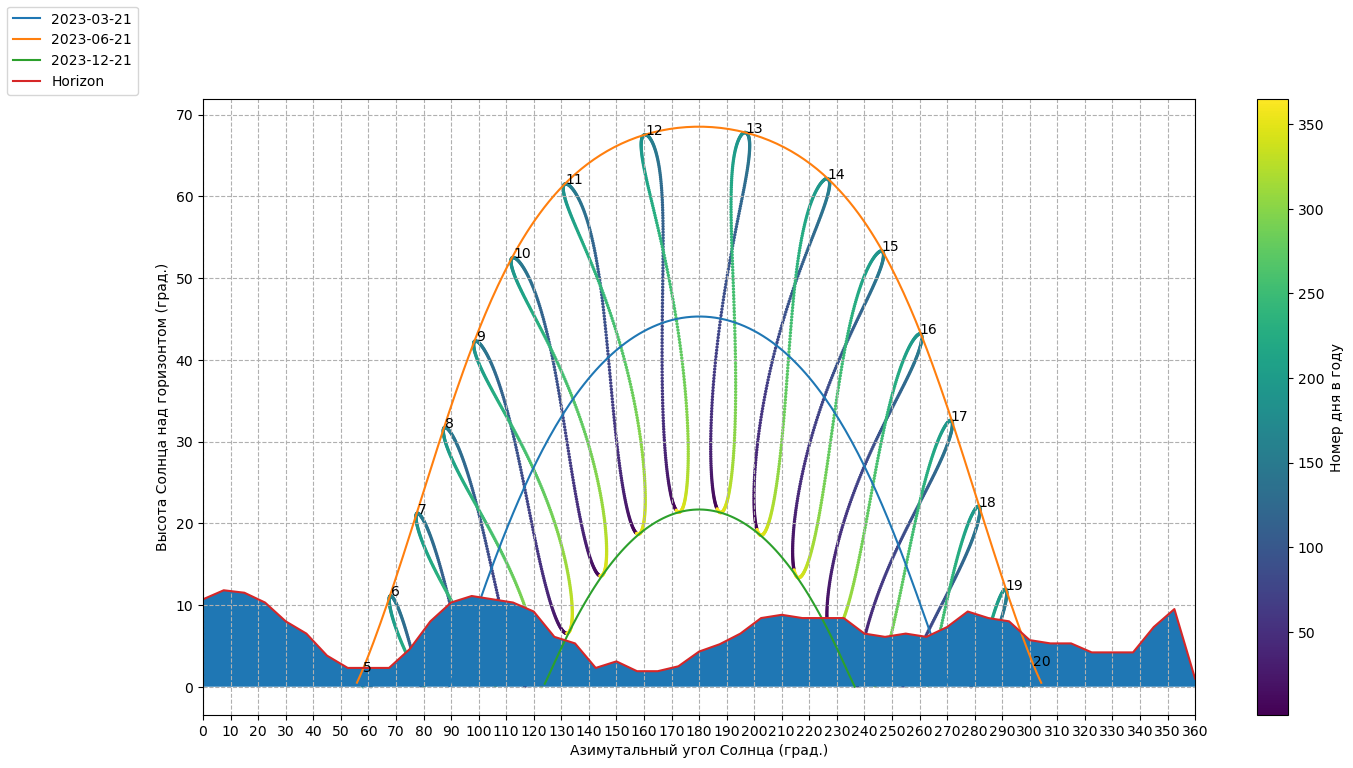

In [73]:
# Данные о "профиле горизонта" хранятся в отдельном csv-файле
# Формат файла - два столбца [azimuth] и [elevation], соответствующих угловой высоте объекта,
# который расположен на указанном азимуте
#
horizon_profile = pd.read_csv('Horizon.csv', sep=';', header=0)

# Удалим ночной период времени (когда Солнце находится под горизонтом)
solpos = SPA.loc[SPA['apparent_elevation'] > 0, :]

# Будем строить несколько графиков, общий размер поля построения - 16х8
fig, ax = plt.subplots(figsize=(16, 8))

# построим "точечный" график - зависимость высоты Солнца над горизонтом от азимутального угла
points = ax.scatter(solpos.azimuth, solpos.apparent_elevation, s=2, c=solpos.index.dayofyear, label=None)
fig.colorbar(points, label='Номер дня в году')

# Подпись номера часа к каждой аналлеме
for hour in np.unique(solpos.index.hour):
    # Определим позицию подписи по наибольшей высоте Солнца над гориднтом доля каждого часа
    subset = solpos.loc[solpos.index.hour == hour, :]
    height = subset.apparent_elevation
    pos = solpos.loc[height.idxmax(), :]
    ax.text(pos['azimuth'], pos['apparent_elevation'], str(hour))

# Построение графиков изменения положения Cолнца в течение дня (для характерных дней года)
for date in pd.to_datetime(['2023-03-21', '2023-06-21', '2023-12-21']):
    times = pd.date_range(date, date+pd.Timedelta('24h'), freq='5min', tz=A.tz)
    solpos = pvlib.solarposition.spa_python(times, 
                                     A.latitude, 
                                     A.longitude, 
                                     altitude=A.altitude)
    solpos = solpos.loc[solpos['apparent_elevation'] > 0, :]
    label = date.strftime('%Y-%m-%d')
    ax.plot(solpos.azimuth, solpos.apparent_elevation, label=label)

# Отобразим на графике форму горизонта
ax.plot(horizon_profile['azimuth'], horizon_profile['elevation'], label='Horizon')
# Для красоты закрасим пространство под графиком
ax.fill_between(horizon_profile['azimuth'], horizon_profile['elevation'])

plt.xticks(range(0, 361, 10))  # Деления от 0 до 90 с шагом 10
plt.xlim(0, 360)  # Ограничение диапазона углов

# Покажем легенду, установим подписи осей и сетку
ax.figure.legend(loc='upper left')
ax.set_xlabel('Азимутальный угол Солнца (град.)')
ax.set_ylabel('Высота Солнца над горизонтом (град.)')
plt.grid(linestyle='--')

plt.show()

## Дальнее затенение площадки:

In [74]:
# Определение наличия дальнего затенения:
# Если угловая высота Солнца меньше высоты профиля горизонта на рассматриваемом азимуте, то
# дальнее затенение есть и Far shading = 0
# в противном случае - Far shading = 1
# В дальнейшем можно будет умножать приход СИ на значение Far shading и учитывать таким образом наличие или отсутствие 
# дальнего затенения.
# Примечание: не учитывается наличие диффузной составляющей СИ

for i in range(len(LOSS)):
    sol_az = SPA['azimuth'].iloc[i]
    sol_el = SPA['apparent_elevation'].iloc[i]
    for j in range(len(horizon_profile)-1):
        hor_el = horizon_profile['elevation'].iloc[j]
        hor_az1 = horizon_profile['azimuth'].iloc[j]
        hor_az2 = horizon_profile['azimuth'].iloc[j+1]
        if sol_az >= hor_az1 and sol_az <= hor_az2:
            if sol_el < hor_el:
                LOSS.loc[i, 'Far Shading'] = 0
            else:
                LOSS.loc[i, 'Far Shading'] = 1

## Затенение одного модуля:

In [75]:
# 1. Создание DataFrame с потерями
alpha_p = math.radians(180)  # Азимут установки
gamma_p = angle  # Угол установки
Loss = pd.DataFrame(columns=PV_modules_candidates['Name'], 
                   index=PV_Inverters_candidates['Name'])

# 2. Оптимизированное заполнение DC_out_module_p
# Создаем словарь для соответствия модулей и их данных
module_data = {
    'module_1 p_mp': DC_out_module_1_data['p_mp'],
    'module_2 p_mp': DC_out_module_2_data['p_mp'],
    'module_3 p_mp': DC_out_module_3_data['p_mp'],
    'module_4 p_mp': DC_out_module_4_data['p_mp']
}

# Заполняем DataFrame одним присваиванием
DC_out_module_p = pd.DataFrame(module_data, index=DC_out_module_1_data.index)

# 3. Расчет потерь с оптимизированными циклами
for i in range(Candidates_len):
    for k in range(len(PV_Inverters_candidates)):
        shading_losses = []
        
        for j in range(len(LOSS)):
            alpha_S = math.radians(SPA['azimuth'].iloc[j])
            gamma_S = math.radians(SPA['apparent_elevation'].iloc[j])
            
            if abs(gamma_S - gamma_p) < math.pi / 2:
                OA = Len * math.sin(gamma_p) / math.tan(gamma_S)
                OC = Len * math.cos(gamma_p) / math.cos(alpha_S - alpha_p - math.pi)
                OE = s.iloc[k, i] / math.cos(alpha_S - alpha_p - math.pi)
                
                fshanding = (abs(OA) - abs(OE)) / (abs(OA) + abs(OC))
            else:
                fshanding = 0
                
            fshanding = max(0, fshanding)
            reduction_factor = min(1, max(0, 1 - fshanding)) * 0.94 + 0.06
            shading_loss = (1 - LOSS.loc[j, 'Far Shading'] * reduction_factor) * DC_out_module_p.iloc[j, i]
            
            shading_losses.append(shading_loss)
        
        # Записываем сумму потерь для данной комбинации модуль-инвертор
        Loss.iloc[k, i] = sum(shading_losses) 

Loss

Name,Jinko_Solar_Co__Ltd_JKM400M_72BL,Trina_Solar_TSM_350DE14H_II_,LONGi_Green_Energy_Technology_Co__Ltd__LR6_60HIB_300M,Suzhou_Talesun_Solar_Technologies_Co__Ltd__TP7F72M_H__550
Name,,,,
GoodWe_Technologies_Co___Ltd___GW28KLV_SMT_US__240V_,50255.110077,45302.454757,40149.176984,67936.294151
Ginlong_Technologies_Co___Ltd___RHI_1P9K_HVES_5G__240V_,50238.330718,45303.456604,40117.791087,67927.22662
Shenzhen_Sinexcel_Electric_Co___Ltd__PWS1_500KTL_NA__400V_,50239.095552,45309.460318,40850.549488,67952.144314


## Потери на затенение батареи:

In [76]:
Loss_plant = Loss * Scheme_total_data

## Выработка батареи:

In [77]:
# 1. Инициализация DataFrame для напряжений
module_v_data = {
    'module_1 v_mp': DC_out_module_1_data['v_mp'],
    'module_2 v_mp': DC_out_module_2_data['v_mp'],
    'module_3 v_mp': DC_out_module_3_data['v_mp'],
    'module_4 v_mp': DC_out_module_4_data['v_mp']
}
DC_out_module_v = pd.DataFrame(module_v_data, index=DC_out_module_1_data.index)

# 2. Инициализация DataFrame для мощности (аналогично)
module_p_data = {
    'module_1 p_mp': DC_out_module_1_data['p_mp'],
    'module_2 p_mp': DC_out_module_2_data['p_mp'],
    'module_3 p_mp': DC_out_module_3_data['p_mp'],
    'module_4 p_mp': DC_out_module_4_data['p_mp']
}
DC_out_module_p = pd.DataFrame(module_p_data, index=DC_out_module_1_data.index)

# 3. Создание DataFrame для результатов
prod = pd.DataFrame(columns=PV_modules_candidates['Name'], 
                   index=PV_Inverters_candidates['Name'])

# 4. Расчет производительности для всех комбинаций
for i in range(min(Candidates_len, len(PV_Inverters_candidates))):
    inverter = PV_Inverters_candidates.iloc[i]
    
    for module_num in range(1, 5):
        if module_num > len(Scheme_series_data.columns):
            continue
            
        col_name = f'module_{module_num}'
        v_dc = DC_out_module_v[f'{col_name} v_mp'] * Scheme_series_data.iloc[i, module_num-1]
        p_dc = DC_out_module_p[f'{col_name} p_mp'] * Scheme_total_data.iloc[i, module_num-1]
        
        try:
            ACout = pvlib.inverter.sandia(v_dc, p_dc, inverter)
            prod.iloc[i, module_num-1] = sum(ACout) - Loss_plant.iloc[i, module_num-1]
        except (IndexError, KeyError) as e:
            print(f"Ошибка при обработке модуля {module_num} для инвертера {i}: {str(e)}")
            prod.iloc[i, module_num-1] = 0  # или другое значение по умолчанию

prod

Name,Jinko_Solar_Co__Ltd_JKM400M_72BL,Trina_Solar_TSM_350DE14H_II_,LONGi_Green_Energy_Technology_Co__Ltd__LR6_60HIB_300M,Suzhou_Talesun_Solar_Technologies_Co__Ltd__TP7F72M_H__550
Name,,,,
GoodWe_Technologies_Co___Ltd___GW28KLV_SMT_US__240V_,31293873.310749,34709999.891498,35559983.759022,35959004.18227
Ginlong_Technologies_Co___Ltd___RHI_1P9K_HVES_5G__240V_,5945997.795825,5944160.009701,5640383.257591,4073649.685928
Shenzhen_Sinexcel_Electric_Co___Ltd__PWS1_500KTL_NA__400V_,392874713.802742,399025228.668113,391074820.72555,396837578.836287


## КИУМ:

In [78]:
KIUM = pd.DataFrame(columns = PV_modules_candidates['Name'],
                                  index = PV_Inverters_candidates['Name'])

for i in range(Candidates_len):
    for j in range(len(PV_Inverters_candidates)):
        s_1 = (prod.iloc[j,i]) / (Scheme_installed_capacity_data.iloc[j,i] * 8760)
        KIUM.iloc[j,i] = s_1

KIUM

Name,Jinko_Solar_Co__Ltd_JKM400M_72BL,Trina_Solar_TSM_350DE14H_II_,LONGi_Green_Energy_Technology_Co__Ltd__LR6_60HIB_300M,Suzhou_Talesun_Solar_Technologies_Co__Ltd__TP7F72M_H__550
Name,,,,
GoodWe_Technologies_Co___Ltd___GW28KLV_SMT_US__240V_,0.106235,0.107636,0.107256,0.106501
Ginlong_Technologies_Co___Ltd___RHI_1P9K_HVES_5G__240V_,0.105973,0.107526,0.107179,0.105569
Shenzhen_Sinexcel_Electric_Co___Ltd__PWS1_500KTL_NA__400V_,0.104605,0.106148,0.105632,0.105208


## Выработка СЭС:

In [79]:
product = prod * N_battery / 1000000 # МВтч
product

Name,Jinko_Solar_Co__Ltd_JKM400M_72BL,Trina_Solar_TSM_350DE14H_II_,LONGi_Green_Energy_Technology_Co__Ltd__LR6_60HIB_300M,Suzhou_Talesun_Solar_Technologies_Co__Ltd__TP7F72M_H__550
Name,,,,
GoodWe_Technologies_Co___Ltd___GW28KLV_SMT_US__240V_,5601.603323,5657.729982,5654.037418,5609.604652
Ginlong_Technologies_Co___Ltd___RHI_1P9K_HVES_5G__240V_,5571.399935,5652.896169,5634.742874,5552.384522
Shenzhen_Sinexcel_Electric_Co___Ltd__PWS1_500KTL_NA__400V_,5500.245993,5586.353201,5866.122311,5555.726104


## Выработка с выбранной компоновкой оборудования:

           Выработка
Январь    255.544500
Февраль   285.489814
Март      436.254661
Апрель    585.540781
Май       744.068894
Июнь      770.791416
Июль      797.104989
Август    734.430403
Сентябрь  558.468267
Октябрь   412.755745
Ноябрь    185.426975
Декабрь   152.215462
 
Суммарная выроботка 5918.09 МВтч


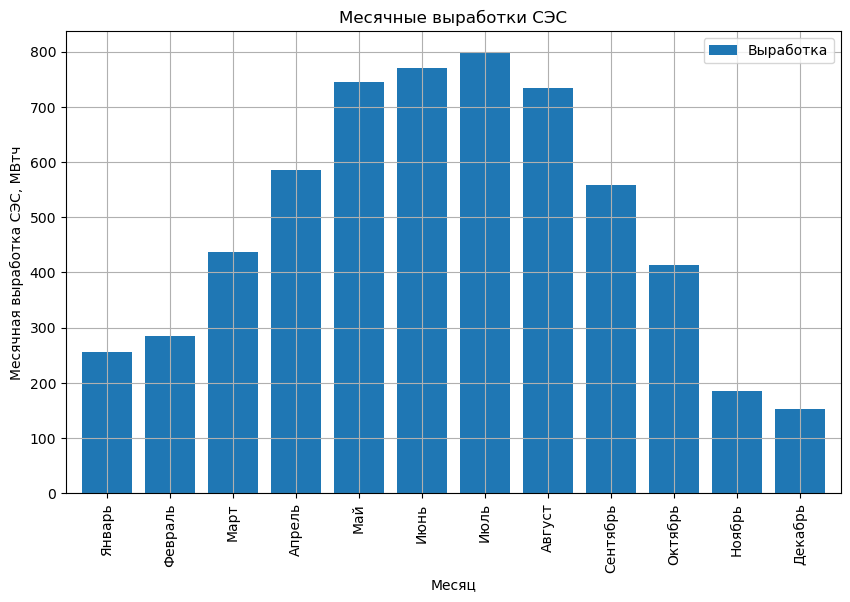

In [80]:
production_month = [0.0] * 12

months_array = ['Январь','Февраль','Март','Апрель','Май','Июнь','Июль','Август','Сентябрь','Октябрь','Ноябрь','Декабрь']

v_dc = DC_out_module_v['module_3 v_mp'] * Scheme_series_data.iloc[2,2]
p_dc = DC_out_module_p['module_3 p_mp'] * Scheme_total_data.iloc[2,2]
inverter = PV_Inverters_candidates.iloc[2]
ACout = pvlib.inverter.sandia(v_dc, p_dc, inverter)

# СКОБКИ [] В DC_out_module_p[], DC_out_module_v[], Scheme_series_data.iloc[], Scheme_total_data.iloc[], PV_Inverters_candidates.iloc[]
# ЗАПОЛНЯЮТСЯ В РУЧНУЮ, В ЗАВИСИМОСТИ ОТ ВЫБОРАННОЙ СХЕМЫ

Len = PV_modules_candidates['Length'].iloc[1] # Длина модуля
for j in range (len(LOSS)):
    alpha_S = SPA['azimuth'].iloc[j]
    alpha_S = math.radians(alpha_S)
    gamma_S = SPA['apparent_elevation'].iloc[j]
    gamma_S = math.radians(gamma_S)
    if abs(gamma_S-gamma_p) < math.pi/2:
        OA = Len*math.sin(gamma_p)/math.tan(gamma_S)
        OE = s.iloc[1,1]/math.cos(alpha_S-alpha_p-math.pi)
        OC = Len*math.cos(gamma_p)/math.cos(alpha_S-alpha_p-math.pi)
        fshanding = (abs(OA)-abs(OE))/(abs(OA)+abs(OC))
    else:
        fshanding = 0
    if fshanding < 0:
        fshanding = 0
    LOSS.loc[j,'Self-shading factor'] = fshanding
    ReductionFactor = min(1, max(0, 1 - LOSS['Self-shading factor'].iloc[j])) * 0.94 + 0.06
    LOSS.loc[j,'ReductionFactor'] = ReductionFactor
    LOSS.loc[j, 'Shading Loss'] = (1-LOSS.loc[j, 'Far Shading']*LOSS.loc[j,'ReductionFactor']) * DC_out_module_p.iloc[j,2]

production = DC_out_module_3_data['p_mp']

for i in range(len(LOSS)):
    production.iloc[i]= (ACout.iloc[i] - LOSS['Shading Loss'].iloc[i]*Scheme_total_data.iloc[2,2])*N_battery.iloc[2,2]

# N_battery.iloc[] и s.iloc[] записываются в зависимости от выбранного GCR
# СКОБКИ [] В N_battery.iloc[], Scheme_total_data.iloc[], Scheme_series_data.iloc[], DC_out_module_p.iloc[j,], PV_Inverters_candidates.iloc[],
# PV_modules_candidates['Length'].iloc[], s.iloc[] ЗАПОЛНЯЮТСЯ В РУЧНУЮ, В ЗАВИСИМОСТИ ОТ ВЫБОРАННОЙ СХЕМЫ




for i in range (lendata):
    month = int(PVGIS_data.index[i].to_pydatetime().strftime('%m'))
    production_month[month - 1] += float(production.iloc[i] / 1000000)


pd_transf = {'Выработка': production_month}

pd_month_production = pd.DataFrame(pd_transf, index = months_array)
print(pd_month_production)
print(' ')
print('Суммарная выроботка', round(sum(pd_month_production['Выработка']),2), 'МВтч')

pd_month_production.iloc[0 : len(pd_month_production), [0]].plot(kind = 'bar', figsize = (10,6), width = 0.8)
plt.xlabel('Месяц')
plt.ylabel('Месячная выработка СЭС, МВтч') 
plt.grid()
plt.title('Месячные выработки СЭС')
plt.show()

### Чтобы инициировать следующий блок, нужно перевести его в формат code. Блок просчитывает все варианты параметров СЭС для разных вариантов доступной площади.

In [81]:
gcr_results = {}

# Перебор значений GCR от 0.4 до 0.9 с шагом 0.1
for gcr in [round(x * 0.1, 1) for x in range(4, 10)]:
    GCR1 = gcr
    
    # Создаем словарь для хранения результатов текущего GCR
    current_gcr_data = {}
    
    # Расчет Loss1
    Loss1 = pd.DataFrame(columns=PV_modules_candidates['Name'], index=PV_Inverters_candidates['Name'])
    R1 = pd.DataFrame(columns=PV_modules_candidates['Name'], index=PV_Inverters_candidates['Name'])
    s1 = pd.DataFrame(columns=PV_modules_candidates['Name'], index=PV_Inverters_candidates['Name'])
    
    for i in range(Candidates_len):
        Len = PV_modules_candidates['Length'].iloc[i]
        for k in range(len(PV_Inverters_candidates)):
            R1.iloc[k,i] = Len / GCR1
            s1.iloc[k,i] = Len * (1 / GCR1 - math.cos(gamma_p))
            for j in range(len(LOSS)):
                alpha_S = SPA['azimuth'].iloc[j]
                alpha_S = math.radians(alpha_S)
                gamma_S = SPA['apparent_elevation'].iloc[j]
                gamma_S = math.radians(gamma_S)
                if abs(gamma_S - gamma_p) < math.pi/2:
                    OA = Len * math.sin(gamma_p) / math.tan(gamma_S)
                    OC = Len * math.cos(gamma_p) / math.cos(alpha_S - alpha_p - math.pi)
                    OE = s.iloc[k, i] / math.cos(alpha_S - alpha_p - math.pi)
                    
                    fshanding = (abs(OA) - abs(OE)) / (abs(OA) + abs(OC))
                else:
                    fshanding = 0
                if fshanding < 0:
                    fshanding = 0
                LOSS.loc[j, 'Self-shading factor'] = fshanding
                ReductionFactor = min(1, max(0, 1 - LOSS['Self-shading factor'].iloc[j])) * 0.94 + 0.06
                LOSS.loc[j, 'ReductionFactor'] = ReductionFactor
                LOSS.loc[j, 'Shading Loss'] = (1 - LOSS.loc[j, 'Far Shading'] * LOSS.loc[j, 'ReductionFactor']) * DC_out_module_p.iloc[j,i]
            Loss1.iloc[k,i] = sum(LOSS['Shading Loss'])
    
    current_gcr_data['Loss'] = Loss1
    
    # Расчет prod1
    Loss_plant1 = Loss1 * Scheme_total_data
    prod1 = pd.DataFrame(columns=PV_modules_candidates['Name'], index=PV_Inverters_candidates['Name'])
    
    for i in range(min(Candidates_len, len(PV_Inverters_candidates))):
        v_dc = DC_out_module_v['module_1 v_mp'] * Scheme_series_data.iloc[i,0]
        p_dc = DC_out_module_p['module_1 p_mp'] * Scheme_total_data.iloc[i,0]
        inverter = PV_Inverters_candidates.iloc[i]
        ACout = pvlib.inverter.sandia(v_dc, p_dc, inverter)
        prod1.iloc[i,0] = sum(ACout) - Loss_plant1.iloc[i,0]
        
        v_dc = DC_out_module_v['module_2 v_mp'] * Scheme_series_data.iloc[i,1]
        p_dc = DC_out_module_p['module_2 p_mp'] * Scheme_total_data.iloc[i,1]
        ACout = pvlib.inverter.sandia(v_dc, p_dc, inverter)
        prod1.iloc[i,1] = sum(ACout) - Loss_plant1.iloc[i,1]
        
        v_dc = DC_out_module_v['module_3 v_mp'] * Scheme_series_data.iloc[i,2]
        p_dc = DC_out_module_p['module_3 p_mp'] * Scheme_total_data.iloc[i,2]
        ACout = pvlib.inverter.sandia(v_dc, p_dc, inverter)
        prod1.iloc[i,2] = sum(ACout) - Loss_plant1.iloc[i,2]

        v_dc = DC_out_module_v['module_4 v_mp'] * Scheme_series_data.iloc[i,3]
        p_dc = DC_out_module_p['module_4 p_mp'] * Scheme_total_data.iloc[i,3]
        ACout = pvlib.inverter.sandia(v_dc, p_dc, inverter)
        prod1.iloc[i,3] = sum(ACout) - Loss_plant1.iloc[i,3]
    
    current_gcr_data['Production'] = prod1
    
    # Расчет KIUM
    KIUM = pd.DataFrame(columns=PV_modules_candidates['Name'], index=PV_Inverters_candidates['Name'])
    for i in range(Candidates_len):
        for j in range(len(PV_Inverters_candidates)):
            s_1 = (prod1.iloc[j,i]) / (Scheme_installed_capacity_data.iloc[j,i]*8760)
            KIUM.iloc[j,i] = s_1
    current_gcr_data['KIUM'] = KIUM
    
    # Расчет S_module1
    S_module1 = pd.DataFrame(columns=PV_modules_candidates['Name'], index=PV_Inverters_candidates['Name'])
    for i in range(Candidates_len):
        for j in range(len(PV_Inverters_candidates)):
            s_b = R1.iloc[j,i] * PV_modules_candidates['Width'].iloc[i]
            S_module1.iloc[j,i] = s_b
    current_gcr_data['Module_Area'] = S_module1
    
    # Расчет S_battery1
    S_battery1 = S_module1 * Scheme_total_data
    current_gcr_data['Battery_Area'] = S_battery1
    
    # Расчет N_battery1
    N_battery1 = S_access // S_battery1
    current_gcr_data['Battery_Count'] = N_battery1
    
    # Расчет Capacity_plant1
    Capacity_plant1 = N_battery1 * Scheme_installed_capacity_data / 1000
    current_gcr_data['Plant_Capacity'] = Capacity_plant1
    
    # Расчет product1
    product1 = prod1 * N_battery1 / 1000000
    current_gcr_data['Energy_Output'] = product1
    
    # Сохраняем все данные для текущего GCR
    gcr_results[f'GCR_{gcr}'] = current_gcr_data

# Создаем отдельные датафреймы для каждого GCR и каждой метрики
for gcr in [0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    gcr_str = f"GCR_{gcr}".replace('.', '_')
    
    # Создаем динамические переменные для каждого GCR
    for metric in ['Loss', 'Production', 'KIUM', 'Module_Area', 'Battery_Area', 
                  'Battery_Count', 'Plant_Capacity', 'Energy_Output']:
        var_name = f"{gcr_str}_{metric}"
        globals()[var_name] = gcr_results[f'GCR_{gcr}'][metric]



for gcr in [0.4, 0.5, 0.6, 0.7, 0.8, 0.9]:
    print(f"\n{'='*60}")
    print(f"ПОЛНЫЕ РЕЗУЛЬТАТЫ ДЛЯ GCR = {gcr}")
    print(f"{'='*60}")
    
    gcr_data = gcr_results[f'GCR_{gcr}']
    
    print("\nТАБЛИЦА ПОТЕРЬ:")
    print(gcr_data['Loss'])
    
    print("\nТАБЛИЦА ПРОИЗВОДСТВА:")
    print(gcr_data['Production'])
    
    print("\nТАБЛИЦА КИУМ:")
    print(gcr_data['KIUM'])
    
    print("\nПЛОЩАДЬ МОДУЛЕЙ (м²):")
    print(gcr_data['Module_Area'])
    
    print("\nПЛОЩАДЬ БАТАРЕЙ (м²):")
    print(gcr_data['Battery_Area'])
    
    print("\nКОЛИЧЕСТВО БАТАРЕЙ:")
    print(gcr_data['Battery_Count'])
    
    print("\nМОЩНОСТЬ СТАНЦИИ (кВт):")
    print(gcr_data['Plant_Capacity'])
    
    print("\nВЫРАБОТКА ЭНЕРГИИ (МВт·ч):")
    print(gcr_data['Energy_Output'])


ПОЛНЫЕ РЕЗУЛЬТАТЫ ДЛЯ GCR = 0.4

ТАБЛИЦА ПОТЕРЬ:
Name                                               Jinko_Solar_Co__Ltd_JKM400M_72BL  \
Name                                                                                  
GoodWe_Technologies_Co___Ltd___GW28KLV_SMT_US__...                     49693.799206   
Ginlong_Technologies_Co___Ltd___RHI_1P9K_HVES_5...                     49678.706678   
Shenzhen_Sinexcel_Electric_Co___Ltd__PWS1_500KT...                     49679.394624   

Name                                               Trina_Solar_TSM_350DE14H_II_  \
Name                                                                              
GoodWe_Technologies_Co___Ltd___GW28KLV_SMT_US__...                  44743.54134   
Ginlong_Technologies_Co___Ltd___RHI_1P9K_HVES_5...                 44744.466593   
Shenzhen_Sinexcel_Electric_Co___Ltd__PWS1_500KT...                 44750.011304   

Name                                               LONGi_Green_Energy_Technology_Co__Ltd__LR6_60HI

## Экономическая эффективность проекта СЭС:

Результаты анализа окупаемости:
Капитальные затраты: 618.942 млн руб
Годовые операционные затраты: 6.189 млн руб
Годовой чистый денежный поток: 35.237 млн руб

Простой срок окупаемости: 18.0
Остаток долга на конец периода: 0.00 млн руб

Дисконтированный срок окупаемости: Не окупится за указанный период
Остаток долга (дисконт.) на конец периода: 299.09 млн руб


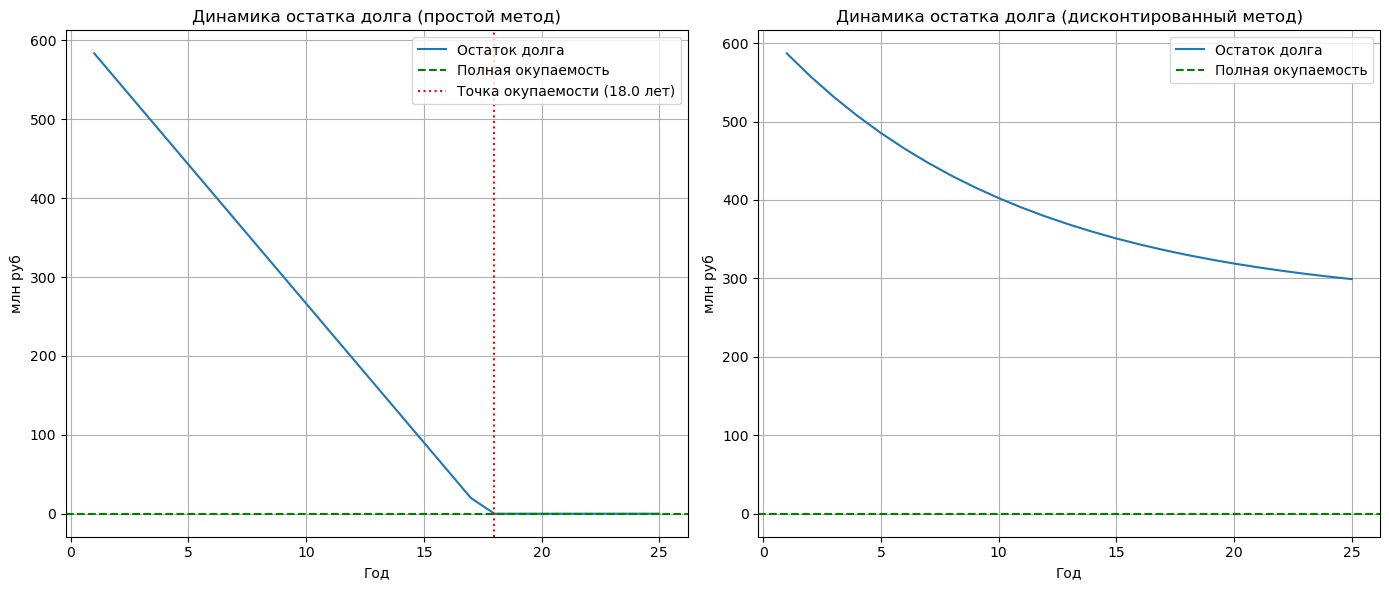


Таблица денежных потоков:


,Год,Чистый денежный поток,Остаток долга,Дисконтированный поток,Остаток долга (дисконт.)
0,1,35.237223,583.704777,32.033839,586.908161
1,2,35.237223,548.467553,29.121672,557.786488
2,3,35.237223,513.230330,26.474247,531.312241
3,4,35.237223,477.993107,24.067498,507.244743
4,5,35.237223,442.755883,21.879543,485.365200
5,6,35.237223,407.518660,19.890494,465.474706
6,7,35.237223,372.281437,18.082267,447.392439
7,8,35.237223,337.044213,16.438425,430.954014
8,9,35.237223,301.806990,14.944022,416.009992
9,10,35.237223,266.569767,13.585475,402.424517


In [82]:
# Входные данные
building_cost = 103157        # Стоимость постройки на 1 кВт мощности станции
initial_investment = building_cost * (Capacity_necessary / 1000) / 1000000  # Капитальные затраты на строительство СЭС заданной мощностью (млн. руб)
opex_ratio = 0.01             # Доля операционных затрат от капитальных
electricity_cost_hutor = 7000      # Стоимость 1 МВт*ч для хутора
electricity_cost_grid = 7000        # Стоимость 1 МВт*ч в сеть
annual_revenue = electricity_cost_hutor * (sum(pd_month_production['Выработка']) / 1000000) * 0.66 + electricity_cost_grid * (sum(pd_month_production['Выработка']) / 1000000) * 0.34   # Выручка в год (млн. руб)
discount_rate = 0.10          # Ставка дисконтирования (10%)
years = 25                    # Период анализа

# Рассчитываем операционные затраты
annual_opex = initial_investment * opex_ratio

# Рассчитываем чистый денежный поток
annual_cash_flow = annual_revenue - annual_opex

# Создаем таблицу денежных потоков
cash_flows = []
remaining_balance = initial_investment  # Остаток инвестиций к покрытию
remaining_discounted = initial_investment
simple_payback_period = None
discounted_payback_period = None

for year in range(1, years + 1):
    discounted_cf = annual_cash_flow / ((1 + discount_rate) ** year)
    
    # Расчет остаточного долга (простой метод)
    remaining_balance -= annual_cash_flow
    remaining_balance = max(0, remaining_balance)  # Не может быть отрицательным
    
    # Расчет остаточного долга (дисконтированный)
    remaining_discounted -= discounted_cf
    remaining_discounted = max(0, remaining_discounted)
    
    # Проверяем простой срок окупаемости
    if remaining_balance <= 0 and simple_payback_period is None:
        if year == 1:
            simple_payback_period = initial_investment / annual_cash_flow
        else:
            overshoot = abs(remaining_balance + annual_cash_flow)
            simple_payback_period = (year - 1) + (overshoot / annual_cash_flow)
    
    # Проверяем дисконтированный срок окупаемости
    if remaining_discounted <= 0 and discounted_payback_period is None:
        if year == 1:
            discounted_payback_period = initial_investment / discounted_cf
        else:
            overshoot = abs(remaining_discounted + discounted_cf)
            discounted_payback_period = (year - 1) + (overshoot / discounted_cf)
    
    cash_flows.append({
        'Год': year,
        'Чистый денежный поток': annual_cash_flow,
        'Остаток долга': remaining_balance if remaining_balance > 0 else 0,
        'Дисконтированный поток': discounted_cf,
        'Остаток долга (дисконт.)': remaining_discounted if remaining_discounted > 0 else 0
    })

# Проверяем, был ли найден срок окупаемости
if simple_payback_period is None:
    simple_payback_period = "Не окупится за указанный период"
    final_balance = remaining_balance
else:
    final_balance = 0

if discounted_payback_period is None:
    discounted_payback_period = "Не окупится за указанный период"
    final_discounted_balance = remaining_discounted
else:
    final_discounted_balance = 0

# Создаем DataFrame
df = pd.DataFrame(cash_flows)

# Выводим результаты
print("Результаты анализа окупаемости:")
print(f"Капитальные затраты: {initial_investment:.3f} млн руб")
print(f"Годовые операционные затраты: {annual_opex:.3f} млн руб")
print(f"Годовой чистый денежный поток: {annual_cash_flow:.3f} млн руб")
print(f"\nПростой срок окупаемости: {simple_payback_period}")
print(f"Остаток долга на конец периода: {final_balance:.2f} млн руб")
print(f"\nДисконтированный срок окупаемости: {discounted_payback_period}")
print(f"Остаток долга (дисконт.) на конец периода: {final_discounted_balance:.2f} млн руб")

# Визуализация
plt.figure(figsize=(14, 6))

# График остатка долга (простой метод)
plt.subplot(1, 2, 1)
plt.plot(df['Год'], df['Остаток долга'], label='Остаток долга')
plt.axhline(y=0, color='g', linestyle='--', label='Полная окупаемость')
if isinstance(simple_payback_period, float):
    plt.axvline(x=simple_payback_period, color='r', linestyle=':', 
               label=f'Точка окупаемости ({simple_payback_period:.1f} лет)')
plt.title('Динамика остатка долга (простой метод)')
plt.xlabel('Год')
plt.ylabel('млн руб')
plt.legend()
plt.grid(True)

# График остатка долга (дисконтированный метод)
plt.subplot(1, 2, 2)
plt.plot(df['Год'], df['Остаток долга (дисконт.)'], label='Остаток долга')
plt.axhline(y=0, color='g', linestyle='--', label='Полная окупаемость')
if isinstance(discounted_payback_period, float):
    plt.axvline(x=discounted_payback_period, color='r', linestyle=':', 
               label=f'Точка окупаемости ({discounted_payback_period:.1f} лет)')
plt.title('Динамика остатка долга (дисконтированный метод)')
plt.xlabel('Год')
plt.ylabel('млн руб')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

# Выводим таблицу с основными годами
print("\nТаблица денежных потоков:")
display(df.iloc[[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24]])